In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import re
import sklearn

### Training Set

In [2]:
df_airbnb = pd.read_csv('train.csv', low_memory=False)

#### 1. Dimensions of the data

In [3]:
df_airbnb.head()

name  \
0    Private room + garden 2mins walk to everywhere.   
1  On the Beachfront, next to cafes and restaurants.   
2                                 Room in Camperdown   
3                      Beautiful room in summer hill   
4                 2 Bedroom Apartment in Kensington.   

                                             summary  \
0  2 rooms new apartment, your stay with private ...   
1  Beachfront balcony and next to cafes and resta...   
2  Excellent location! Close to superb bars, cafe...   
3  A Typical inner west sydney share house, you w...   
4  2 Bedroom Loft Apartment in a small complex. W...   

                                               space  \
0  2 bedroom apartment, you got one of the room a...   
1  Happy to accommodate your requests, as best we...   
2                                                NaN   
3  Living room, out back balcony, kitchen, bathro...   
4                                                NaN   

                                         description experiences_offered  \
0  2 rooms new apartment, your stay with private ...                none   
1  Beachfront balcony and next to cafes and resta...                none   
2  Excellent location! Close to superb bars, cafe...                none   
3  A Typical inner west sydney share house, you w...                none   
4  2 Bedroom Loft Apartment in a small complex. W...                none   

                               neighborhood_overview  \
0                                                NaN   
1  Comfortable, relaxed, beachy with ample cafes ...   
2                                                NaN   
3  Summer hill, is a gorgeous and quiet  inner we...   
4                                                NaN   

                                               notes  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  Make yourself at home, enjoy a typical inner w...   
4                                                NaN   

                                             transit access  \
0                                                NaN    NaN   
1  The bus stop is within 50m of the front door. ...    NaN   
2                                                NaN    NaN   
3    Train is 5 minutes walking distance from house,    NaN   
4                                                NaN    NaN   

                                         interaction  ...  \
0                                                NaN  ...   
1                                                NaN  ...   
2                                                NaN  ...   
3  I will be away in Europe, so won’t be able to ...  ...   
4                                                NaN  ...   

  is_business_travel_ready          cancellation_policy  \
0                        f                     moderate   
1                        f  strict_14_with_grace_period   
2                        f                     flexible   
3                        f  strict_14_with_grace_period   
4                        f                     flexible   

  require_guest_profile_picture require_guest_phone_verification  \
0                             f                                f   
1                             f                                f   
2                             f                                f   
3                             f                                f   
4                             f                                f   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                              7                                           5   
1                              2                                           1   
2                              1                                           0   
3                              1                                           0

In [4]:
df_airbnb.shape

(9838, 83)

#### 2. Information and general stats about the variables

In [5]:
df_airbnb.describe()

host_id  host_acceptance_rate  host_listings_count  \
count  9.838000e+03                   0.0          9838.000000   
mean   7.216523e+07                   NaN             9.226367   
std    7.285768e+07                   NaN            30.638615   
min    1.409300e+04                   NaN             0.000000   
25%    1.519366e+07                   NaN             1.000000   
50%    4.370941e+07                   NaN             1.000000   
75%    1.135010e+08                   NaN             3.000000   
max    2.746565e+08                   NaN           279.000000   

       host_total_listings_count     latitude    longitude  accommodates  \
count                9838.000000  9838.000000  9838.000000   9838.000000   
mean                    9.226367   -33.862776   151.208011      3.601240   
std                    30.638615     0.071810     0.080174      2.241736   
min                     0.000000   -34.088290   150.601470      1.000000   
25%                     1.000000   -33.896860   151.184900      2.000000   
50%                     1.000000   -33.881150   151.216700      3.000000   
75%                     3.000000   -33.832150   151.262497      4.000000   
max                   279.000000   -33.389730   151.339810     16.000000   

         bathrooms     bedrooms         beds  ...  review_scores_cleanliness  \
count  9833.000000  9835.000000  9824.000000  ...                6884.000000   
mean      1.374504     1.651551     2.096906  ...                   9.280941   
std       0.693098     1.111025     1.555834  ...                   1.191808   
min       0.000000     0.000000     0.000000  ...                   2.000000   
25%       1.000000     1.000000     1.000000  ...                   9.000000   
50%       1.000000     1.000000     2.000000  ...                  10.000000   
75%       2.000000     2.000000     3.000000  ...                  10.000000   
max      11.000000    19.000000    29.000000  ...                  10.000000   

       review_scores_checkin  review_scores_communication  \
count            6879.000000                  6882.000000   
mean                9.737753                     9.747602   
std                 0.771974                     0.773844   
min                 2.000000                     2.000000   
25%                10.000000                    10.000000   
50%                10.000000                    10.000000   
75%                10.000000                    10.000000   
max                10.000000                    10.000000   

       review_scores_location  review_scores_value  \
count             6878.000000          6876.000000   
mean                 9.725647             9.332897   
std                  0.680360             1.017448   
min                  2.000000             2.000000   
25%                 10.000000             9.000000   
50%                 10.000000            10.000000   
75%                 10.000000            10.000000   
max                 10.000000            10.000000   

       calculated_host_listings_count  \
count                     9838.000000   
mean                         7.537304   
std                         24.541786   
min                          1.000000   
25%                          1.000000   
50%                          1.000000   
75%                          2.000000   
max                        197.000000   

       calculated_host_listings_count_entire_homes  \
count                                  9838.000000   
mean                                      6.808091   
std                                      24.617591   
min                                       0.000000   
25%                                       0.000000   
50%                                       1.000000   
75%                                       1.000000   
max                                     197.000000   

       calculated_host_listings_count_private_rooms  \
count                                   9838.000000   
mean   

In [6]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9838 entries, 0 to 9837
Data columns (total 83 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          9838 non-null   object 
 1   summary                                       9838 non-null   object 
 2   space                                         7184 non-null   object 
 3   description                                   9838 non-null   object 
 4   experiences_offered                           9838 non-null   object 
 5   neighborhood_overview                         6400 non-null   object 
 6   notes                                         4300 non-null   object 
 7   transit                                       6469 non-null   object 
 8   access                                        5946 non-null   object 
 9   interaction                                   5960 non-null   o

#### 3. Data Cleaning : Handling Discrepant columns/attributes in the data

In [7]:
def bool_text_to_num(data, col):
    emp_list = []
    for r in data[col]:
        if r == 't':
            emp_list.append(1)
        elif r == 'f':
            emp_list.append(0)
    return emp_list

In [8]:
def string_to_num(data, col):
    
    data[col].fillna('0', inplace=True)
    emp_list = []
    
    for r in data[col]:
        emp_list.append(float(re.sub("[^0-9]","",r)))
    
    return emp_list

In [9]:
def string_to_datetime(data, col):
    data[col].fillna('', inplace=True)
    data[col] = pd.to_datetime(data[col])
    
    return data

In [10]:
def dis_col(df):
    
    df['host_id'] = df['host_id'].astype(str)
    
    df = string_to_datetime(df, 'host_since')
    
    df['host_response_rate'] = string_to_num(df, 'host_response_rate')
    
    df['host_is_superhost'] = bool_text_to_num(df, 'host_is_superhost')
    df['host_identity_verified'] = bool_text_to_num(df, 'host_identity_verified')
    df['is_location_exact'] = bool_text_to_num(df, 'is_location_exact')
    
    #df = string_to_datetime(df, 'first_review')
    #df = string_to_datetime(df, 'last_review')
    
    df['requires_license'] = bool_text_to_num(df, 'requires_license')
    df['instant_bookable'] = bool_text_to_num(df, 'instant_bookable')
    df['is_business_travel_ready'] = bool_text_to_num(df, 'is_business_travel_ready')
    df['require_guest_profile_picture'] = bool_text_to_num(df, 'require_guest_profile_picture')
    df['require_guest_phone_verification'] = bool_text_to_num(df, 'require_guest_phone_verification')
    
    df['price'] = string_to_num(df, 'price')
    
    return df

In [11]:
# dataframe after discrepancy handling

df_air = dis_col(df_airbnb)
df_air.head()

name  \
0    Private room + garden 2mins walk to everywhere.   
1  On the Beachfront, next to cafes and restaurants.   
2                                 Room in Camperdown   
3                      Beautiful room in summer hill   
4                 2 Bedroom Apartment in Kensington.   

                                             summary  \
0  2 rooms new apartment, your stay with private ...   
1  Beachfront balcony and next to cafes and resta...   
2  Excellent location! Close to superb bars, cafe...   
3  A Typical inner west sydney share house, you w...   
4  2 Bedroom Loft Apartment in a small complex. W...   

                                               space  \
0  2 bedroom apartment, you got one of the room a...   
1  Happy to accommodate your requests, as best we...   
2                                                NaN   
3  Living room, out back balcony, kitchen, bathro...   
4                                                NaN   

                                         description experiences_offered  \
0  2 rooms new apartment, your stay with private ...                none   
1  Beachfront balcony and next to cafes and resta...                none   
2  Excellent location! Close to superb bars, cafe...                none   
3  A Typical inner west sydney share house, you w...                none   
4  2 Bedroom Loft Apartment in a small complex. W...                none   

                               neighborhood_overview  \
0                                                NaN   
1  Comfortable, relaxed, beachy with ample cafes ...   
2                                                NaN   
3  Summer hill, is a gorgeous and quiet  inner we...   
4                                                NaN   

                                               notes  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  Make yourself at home, enjoy a typical inner w...   
4                                                NaN   

                                             transit access  \
0                                                NaN    NaN   
1  The bus stop is within 50m of the front door. ...    NaN   
2                                                NaN    NaN   
3    Train is 5 minutes walking distance from house,    NaN   
4                                                NaN    NaN   

                                         interaction  ...  \
0                                                NaN  ...   
1                                                NaN  ...   
2                                                NaN  ...   
3  I will be away in Europe, so won’t be able to ...  ...   
4                                                NaN  ...   

  is_business_travel_ready          cancellation_policy  \
0                        0                     moderate   
1                        0  strict_14_with_grace_period   
2                        0                     flexible   
3                        0  strict_14_with_grace_period   
4                        0                     flexible   

  require_guest_profile_picture require_guest_phone_verification  \
0                             0                                0   
1                             0                                0   
2                             0                                0   
3                             0                                0   
4                             0                                0   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                              7                                           5   
1                              2                                           1   
2                              1                                           0   
3                              1                                           0

In [12]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9838 entries, 0 to 9837
Data columns (total 83 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   name                                          9838 non-null   object        
 1   summary                                       9838 non-null   object        
 2   space                                         7184 non-null   object        
 3   description                                   9838 non-null   object        
 4   experiences_offered                           9838 non-null   object        
 5   neighborhood_overview                         6400 non-null   object        
 6   notes                                         4300 non-null   object        
 7   transit                                       6469 non-null   object        
 8   access                                        5946 non-null   object

#### 4. Investigating Duplicates and Null values

In [13]:
df_air.duplicated(keep=False).sum()

0

We can see that the data has no duplicate rows

Now, let us take a look at the number of Null values in each Column

In [14]:
col = df_air.columns.to_list()
nulls = df_air.isnull().sum().to_list()

pd.DataFrame(list(zip(col, nulls)), columns=['Column_Name', 'NumOfNulls'])

Column_Name  NumOfNulls
0                                           name           0
1                                        summary           0
2                                          space        2654
3                                    description           0
4                            experiences_offered           0
..                                           ...         ...
78   calculated_host_listings_count_entire_homes           0
79  calculated_host_listings_count_private_rooms           0
80   calculated_host_listings_count_shared_rooms           0
81                             reviews_per_month        2698
82                                         price           0

[83 rows x 2 columns]

Dropping columns with 75% or more values as nulls

In [15]:
perc = 25.0
min_count =  int(((100-perc)/100)*df_air.shape[0] + 1)

In [16]:
df_air = df_air.dropna(axis=1, thresh=min_count)
print('Resultant shape of the data looks like this')
print(df_air.shape)

Resultant shape of the data looks like this
(9838, 58)


#### 5. Correlation HeatMap

C:\Users\sriva\AppData\Local\Temp\ipykernel_25216\3022897703.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_air.corr(), annot=True, cmap='OrRd')


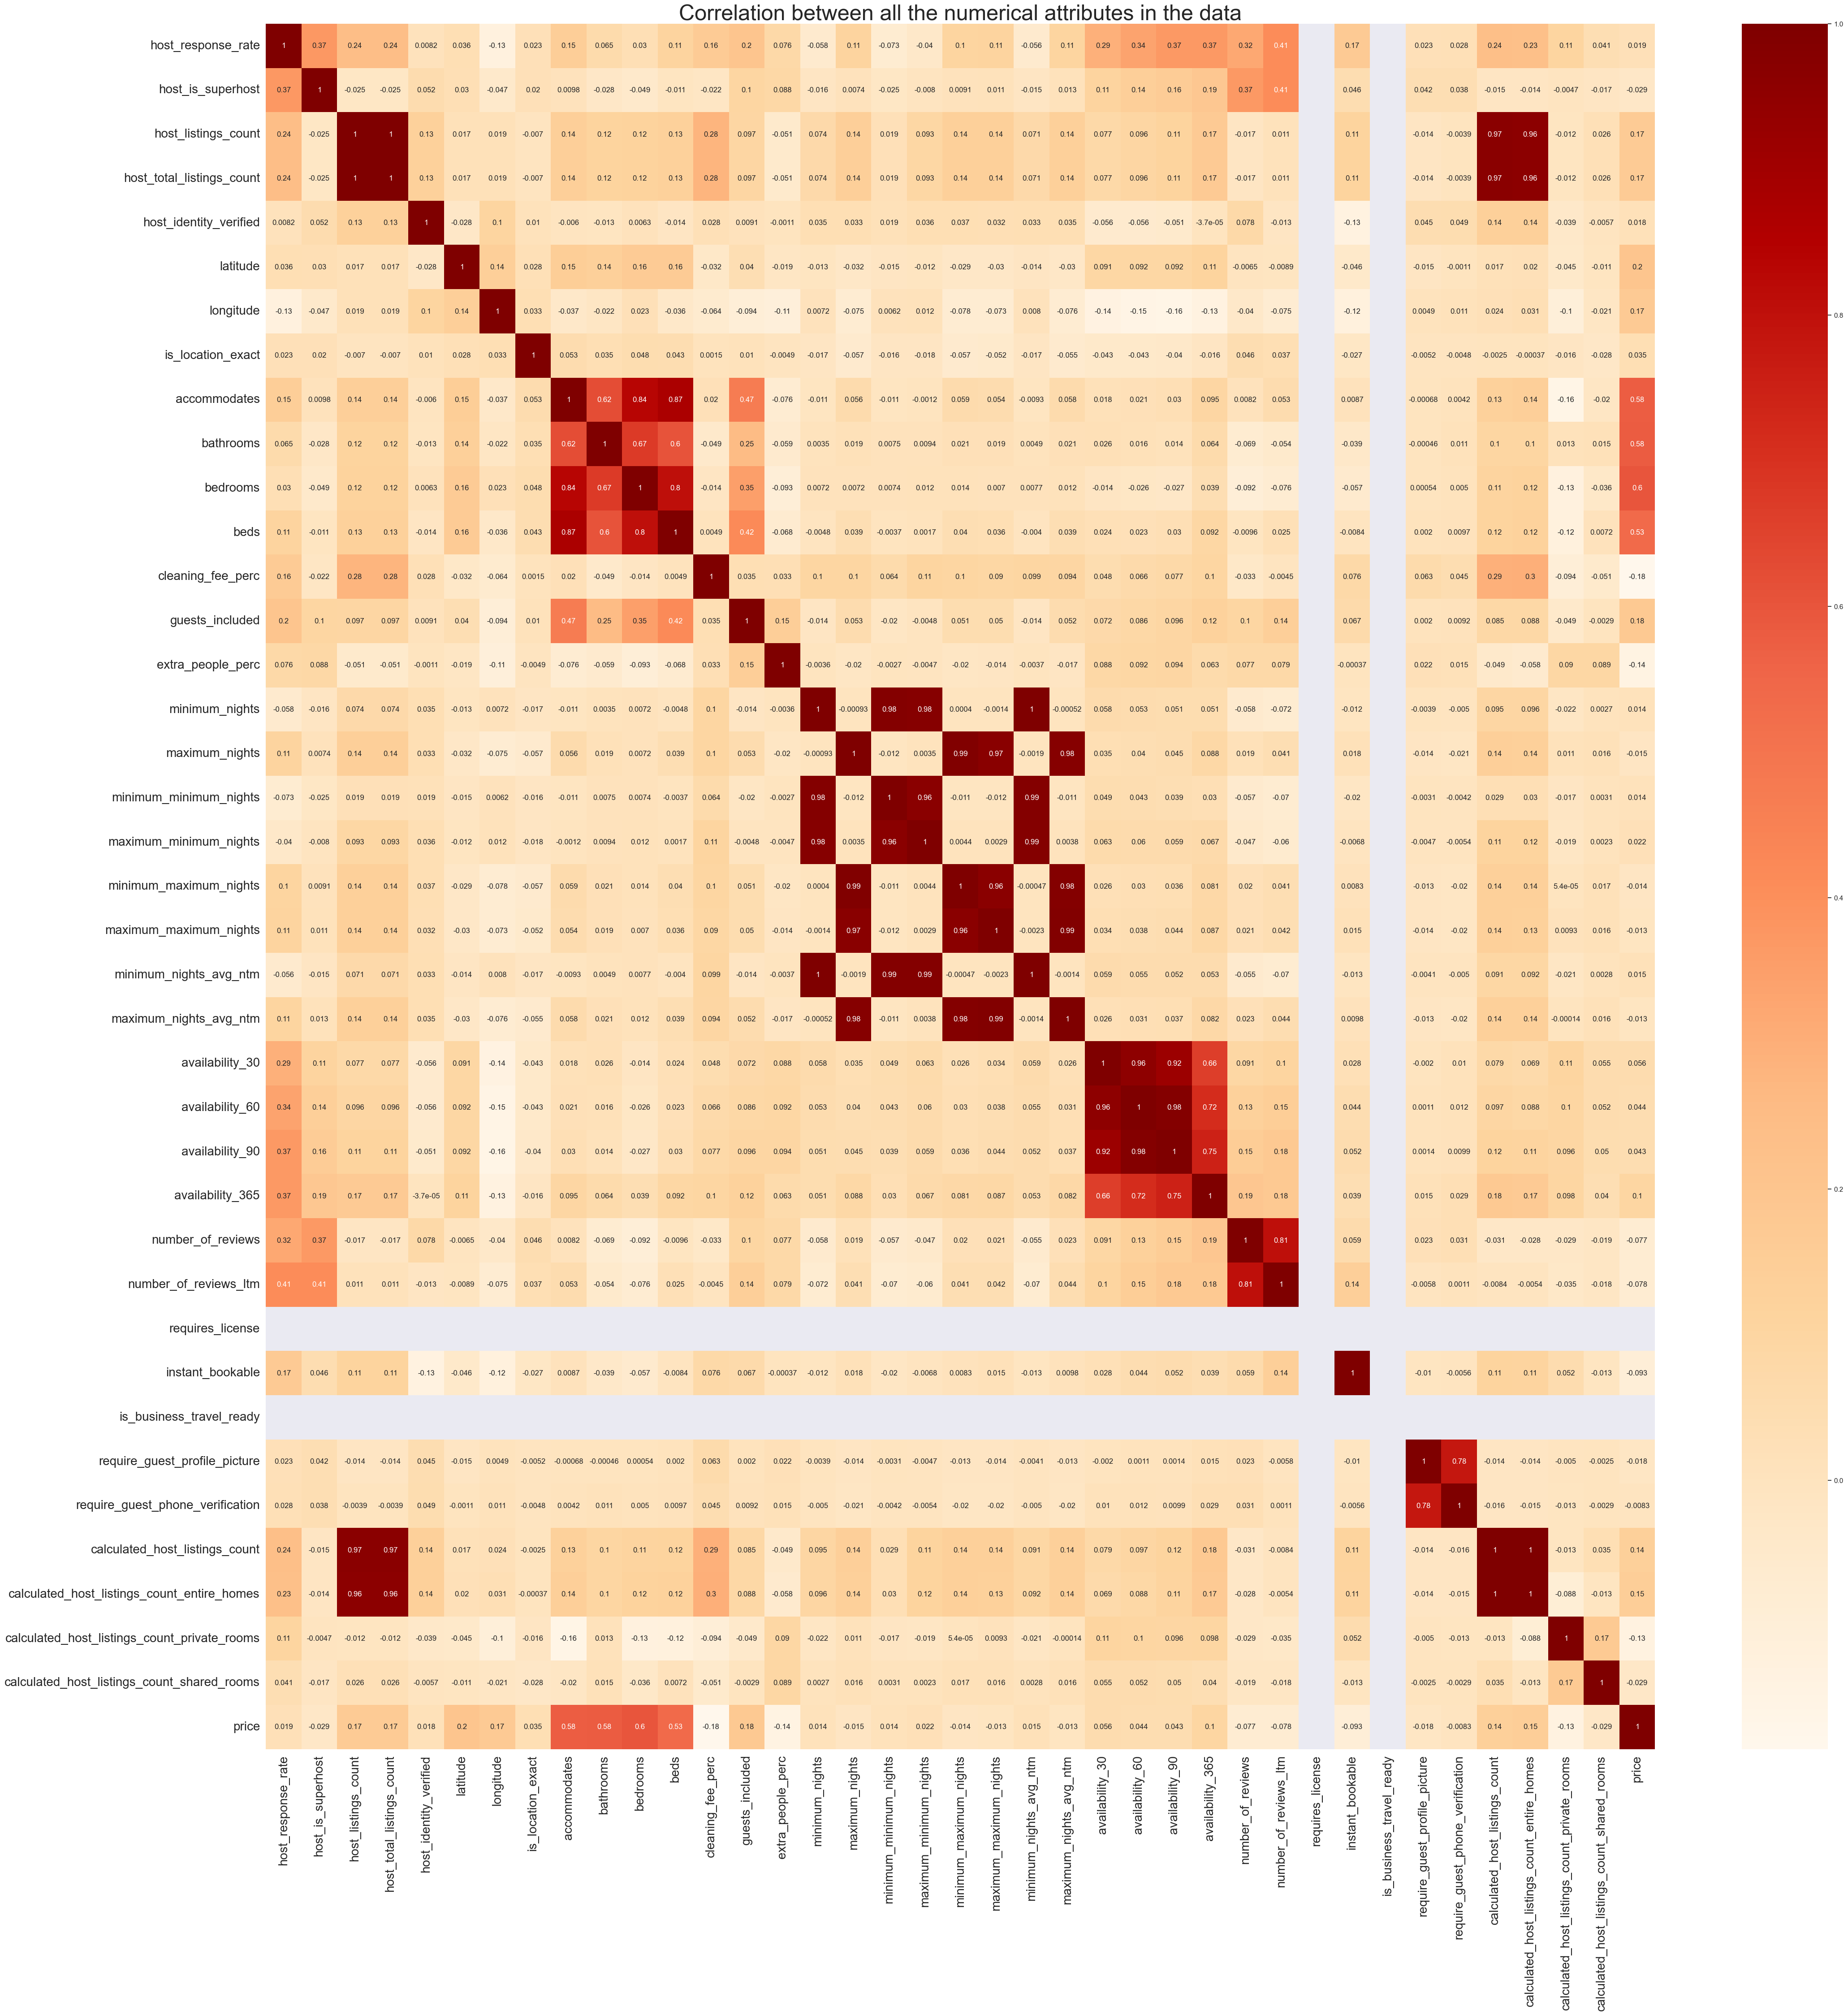

In [17]:
plt.figure(figsize=(50,50))
sns.heatmap(df_air.corr(), annot=True, cmap='OrRd')
plt.savefig("C:\\Users\\sriva\\Downloads\\Intro to ML-EECE5644\\Machine Learning\\Proj\\Findings\\Plots\\Corr_HeatMap.png")
plt.xticks(size=20)
plt.yticks(size=20)
plt.title('Correlation between all the numerical attributes in the data', size=35)
plt.show()

#### 6. Exploring the relationships between Attributes_Of_Importance

In [18]:
corr_mat = df_air.corr()

# Retain upper triangular values of correlation matrix and
# make Lower triangular values Null
upper_corr_mat = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(bool))

# Convert to 1-D series and drop Null values
unique_corr_pairs = upper_corr_mat.unstack().dropna()
  
# Sort correlation pairs
sorted_mat = unique_corr_pairs.sort_values()

C:\Users\sriva\AppData\Local\Temp\ipykernel_25216\1091814535.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df_air.corr()


In [19]:
pd.DataFrame(sorted_mat).to_excel("C:\\Users\\sriva\\Downloads\\Intro to ML-EECE5644\\Machine Learning\\Proj\\Findings\\Others\\Corr_pairs_sorted.xlsx")

In [20]:
corr_pairs_sorted = pd.DataFrame(sorted_mat, columns=['Corr_Coeff'])
corr_pairs_sorted.reset_index(inplace=True)
corr_pairs_sorted.columns = ['Attr1', 'Attr2', 'Corr_Coeff']
corr_pairs_sorted

Attr1  \
0                                           price   
1                                 availability_90   
2    calculated_host_listings_count_private_rooms   
3                                 availability_60   
4                                           price   
..                                            ...   
661                        maximum_nights_avg_ntm   
662                        minimum_maximum_nights   
663   calculated_host_listings_count_entire_homes   
664                        minimum_nights_avg_ntm   
665                     host_total_listings_count   

                              Attr2  Corr_Coeff  
0                 cleaning_fee_perc   -0.184408  
1                         longitude   -0.159721  
2                      accommodates   -0.158781  
3                         longitude   -0.153641  
4                 extra_people_perc   -0.142282  
..                              ...         ...  
661          maximum_maximum_nights    0.987739  
662                  maximum_nights    0.991519  
663  calculated_host_listings_count    0.996600  
664                  minimum_nights    0.997767  
665             host_listings_count    1.000000  

[666 rows x 3 columns]

Considering attributes with correlation coefficient <= -0.08 or >= 0.1 as Attributes_Of_Importance

In [21]:
corr_pairs_imp = corr_pairs_sorted[(corr_pairs_sorted['Attr1']=='price') & ((corr_pairs_sorted['Corr_Coeff']<=-0.08) | (corr_pairs_sorted['Corr_Coeff']>=0.1) )].copy()
corr_pairs_imp

Attr1                                         Attr2  Corr_Coeff
0    price                             cleaning_fee_perc   -0.184408
4    price                             extra_people_perc   -0.142282
6    price  calculated_host_listings_count_private_rooms   -0.132981
18   price                              instant_bookable   -0.092798
517  price                              availability_365    0.102314
559  price                calculated_host_listings_count    0.135993
583  price   calculated_host_listings_count_entire_homes    0.145727
593  price                     host_total_listings_count    0.166480
594  price                           host_listings_count    0.166480
598  price                                     longitude    0.168960
604  price                               guests_included    0.180617
608  price                                      latitude    0.200578
630  price                                          beds    0.532917
631  price                                  accommodates    0.578907
632  price                                     bathrooms    0.582481
633  price                                      bedrooms    0.599133

In [22]:
attr_of_imp = corr_pairs_imp['Attr2'].to_list()
print('These are the attributes of importance according to the Correlation Coeficient\n\n', attr_of_imp)

These are the attributes of importance according to the Correlation Coeficient

 ['cleaning_fee_perc', 'extra_people_perc', 'calculated_host_listings_count_private_rooms', 'instant_bookable', 'availability_365', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'host_total_listings_count', 'host_listings_count', 'longitude', 'guests_included', 'latitude', 'beds', 'accommodates', 'bathrooms', 'bedrooms']


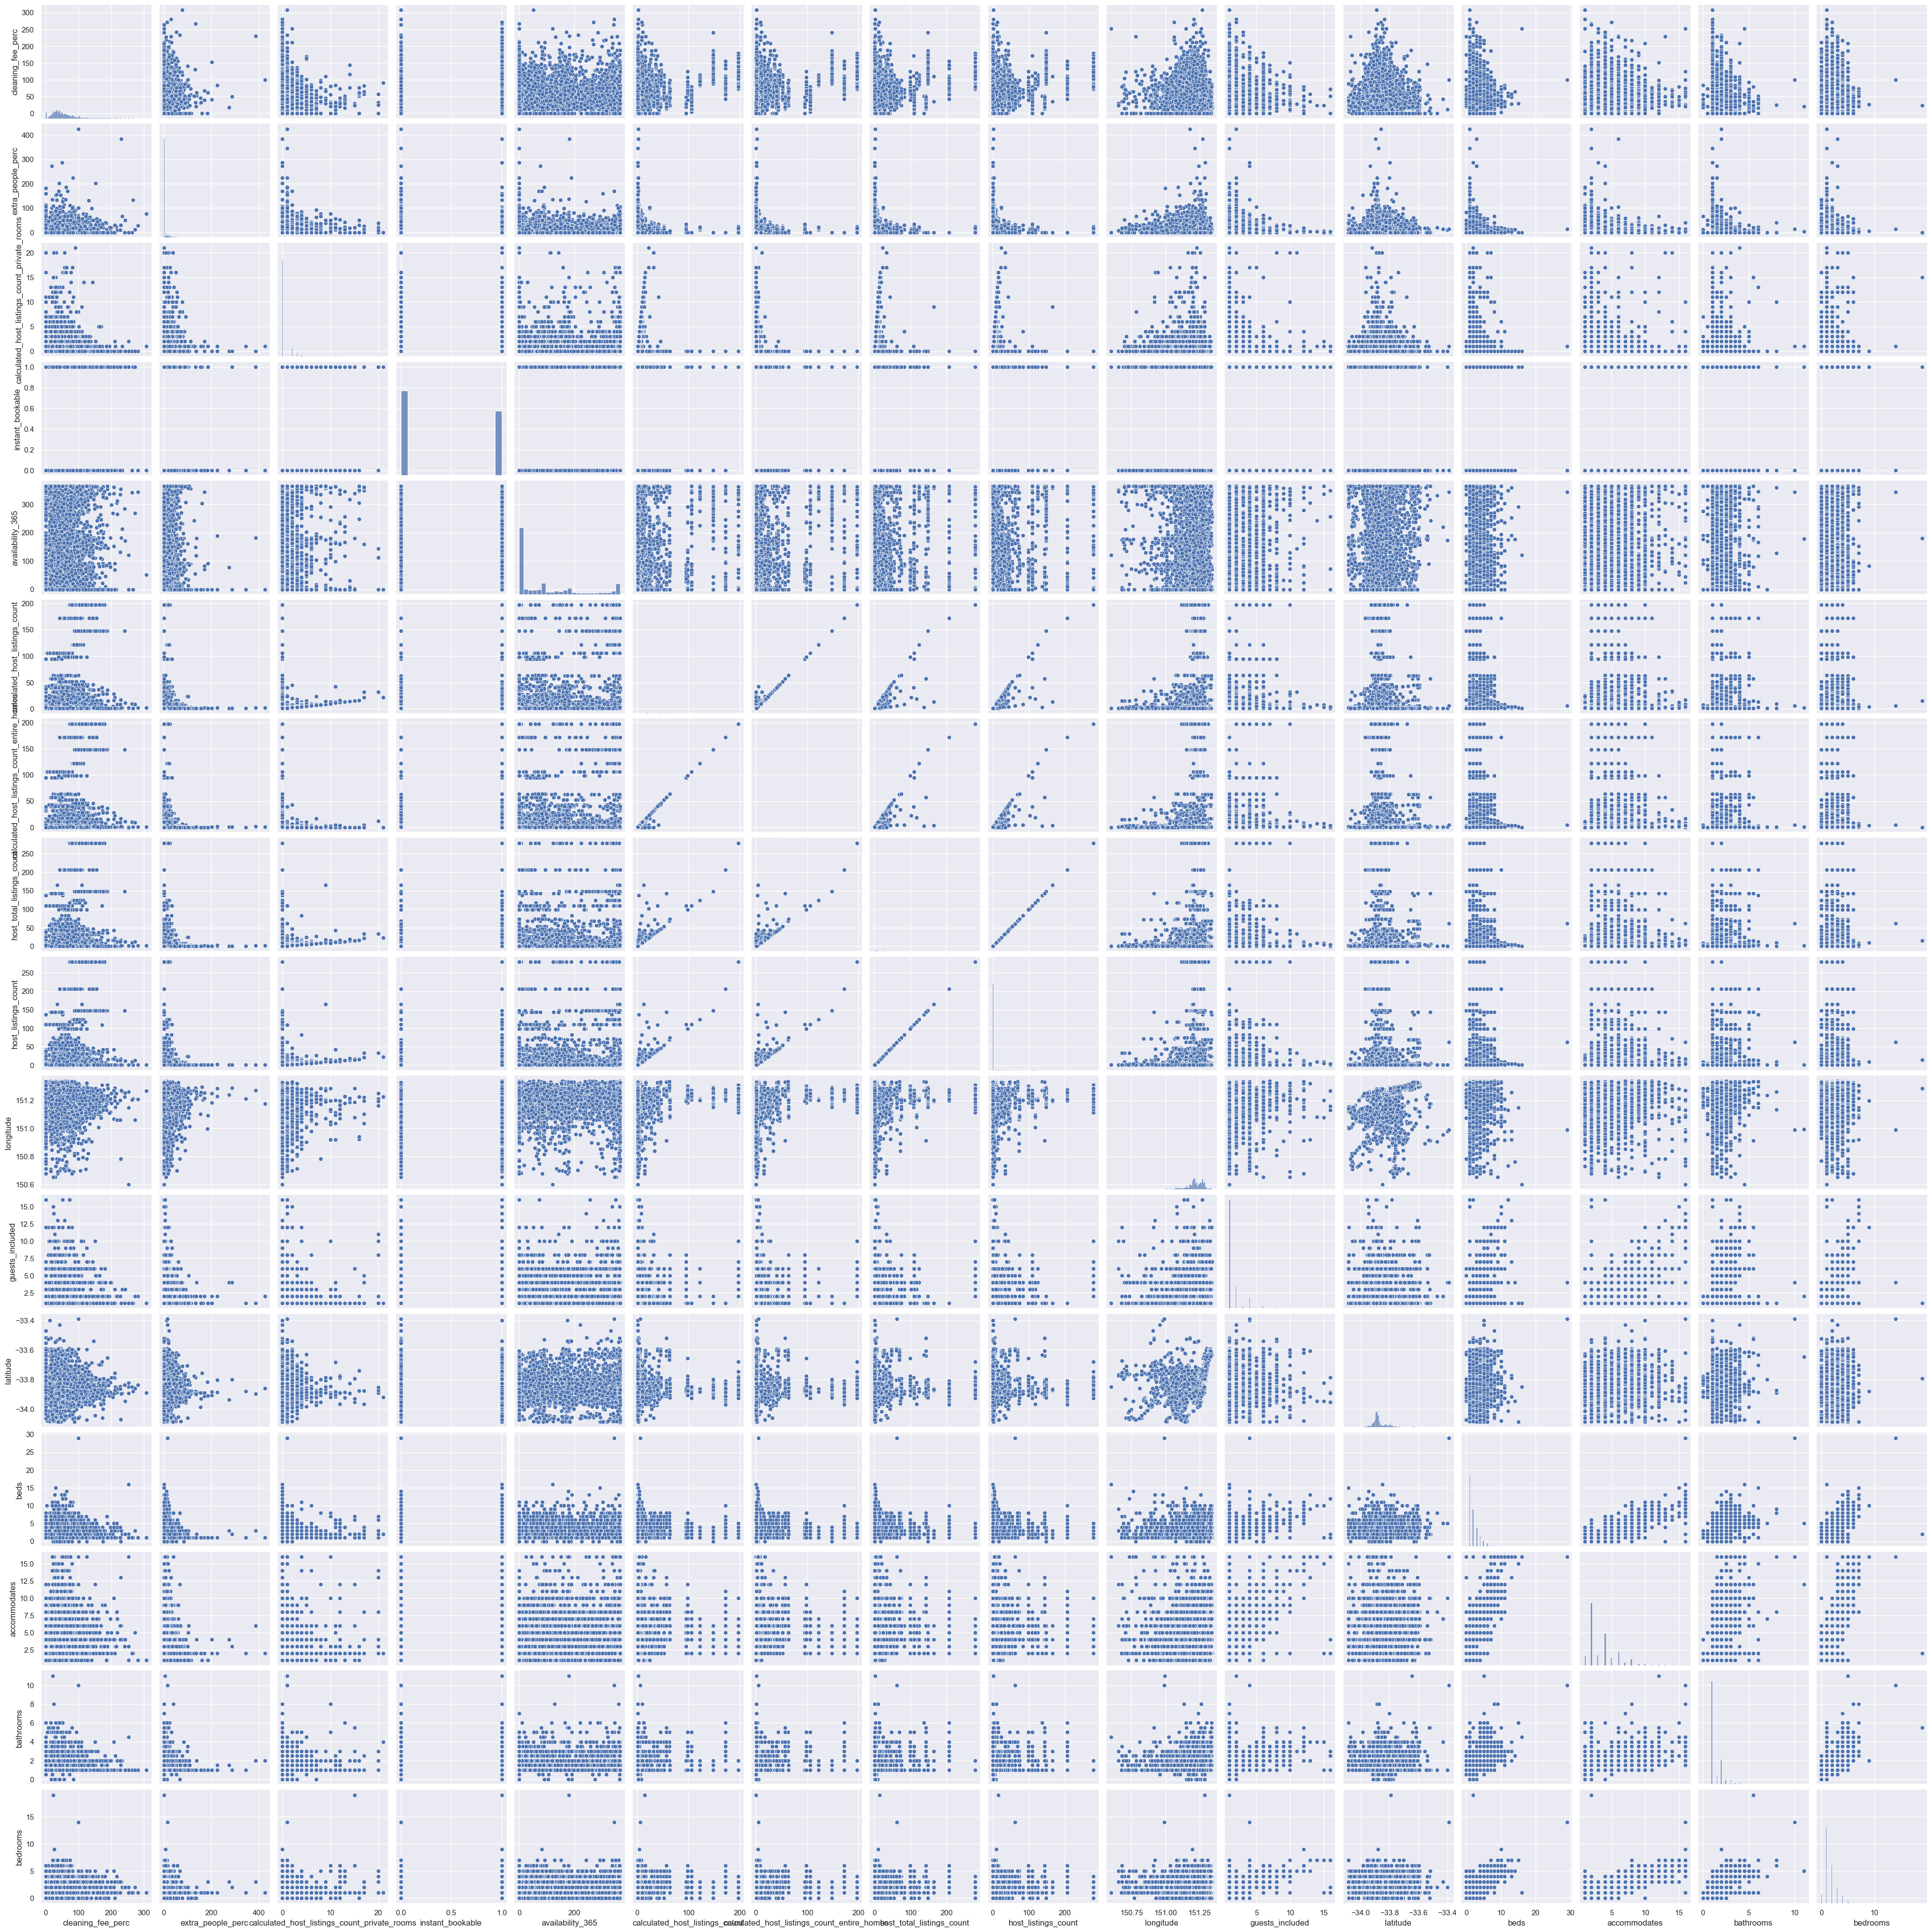

In [23]:
sns.pairplot(df_air[attr_of_imp])
plt.savefig("C:\\Users\\sriva\\Downloads\\Intro to ML-EECE5644\\Machine Learning\\Proj\\Findings\\Plots\\Pairplot_imp_attr.png")
plt.show()

#### 7. Exploring the trends in Attributes_Of_Importance w.r.t Price

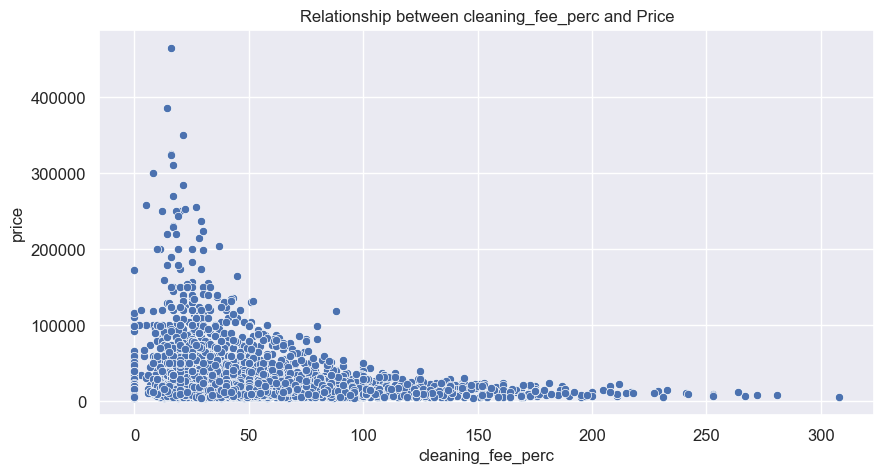

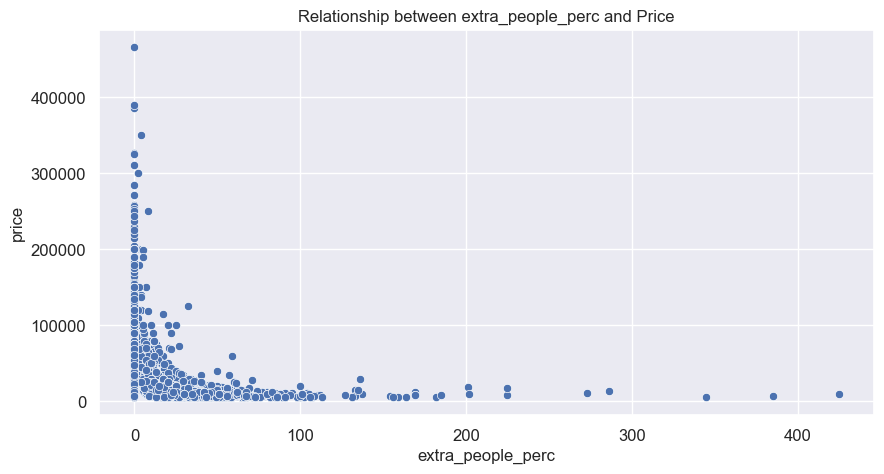

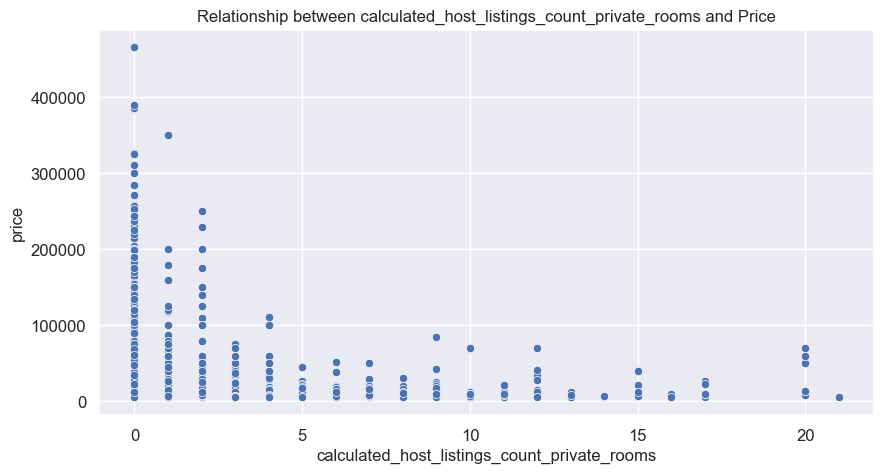

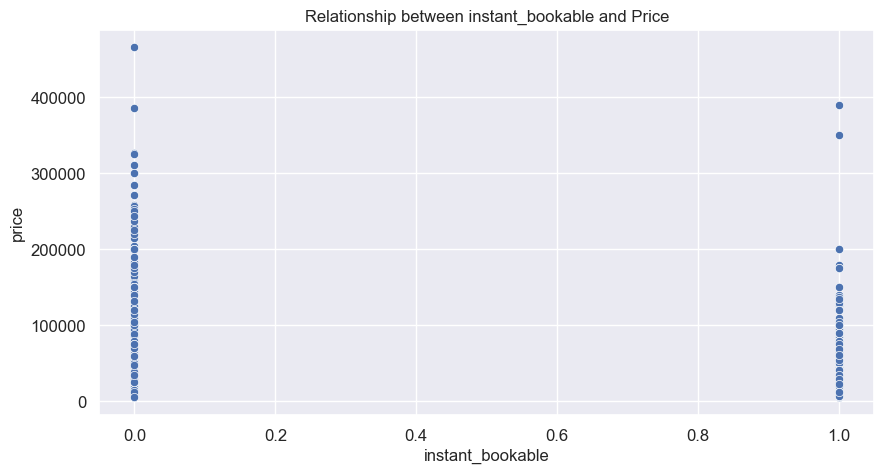

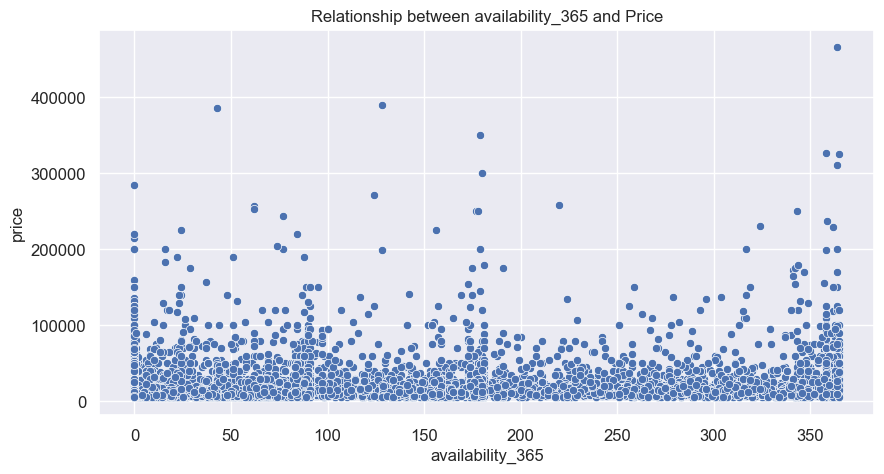

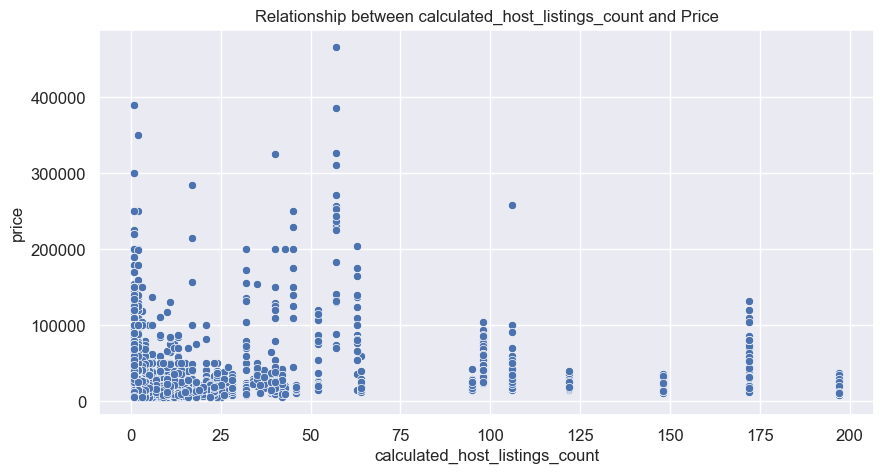

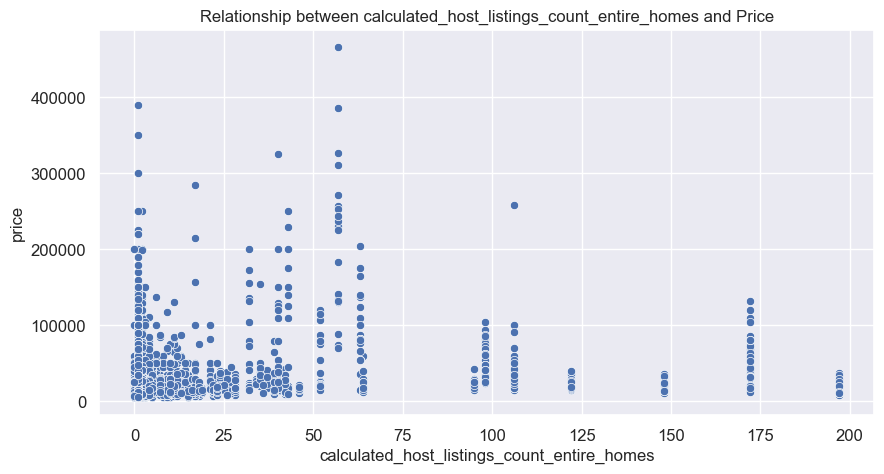

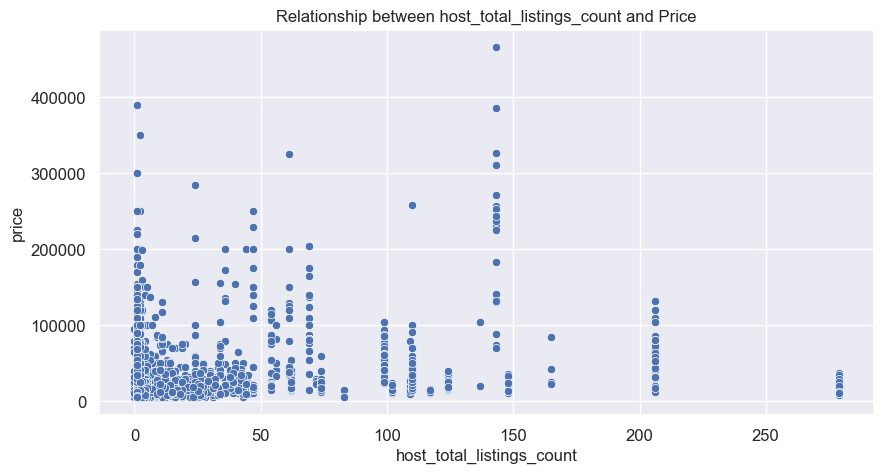

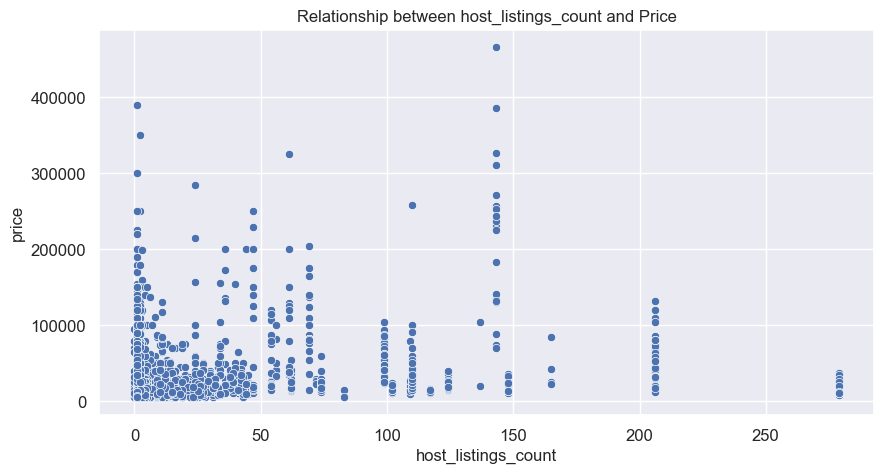

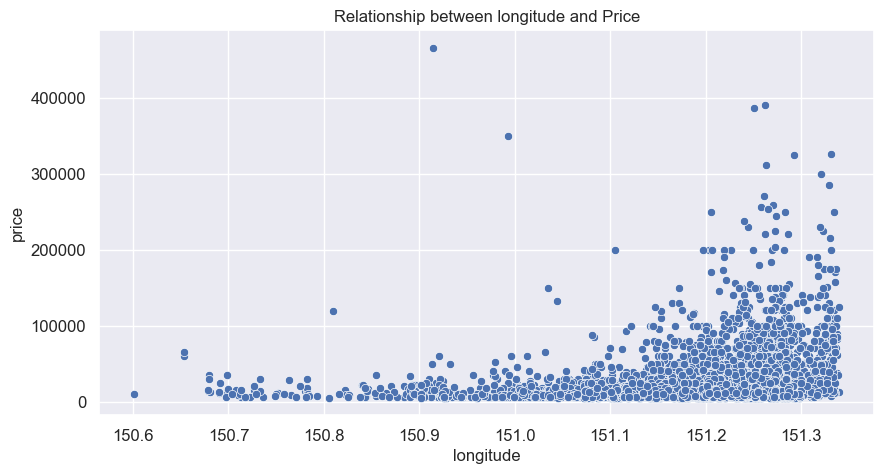

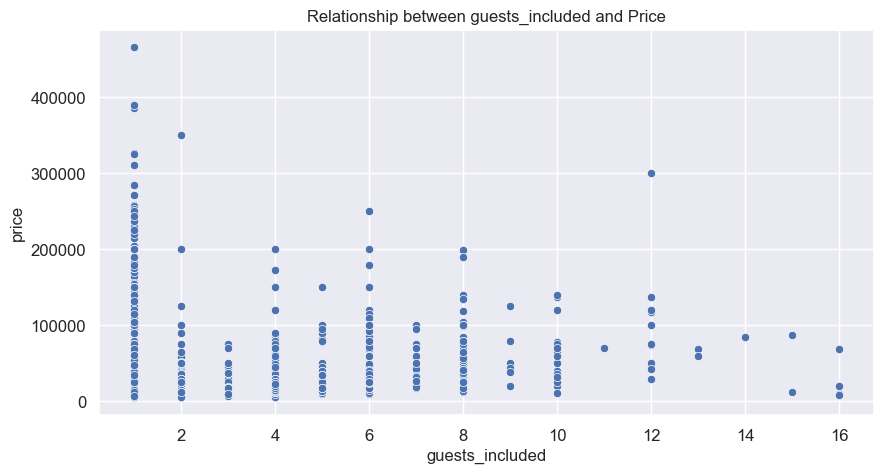

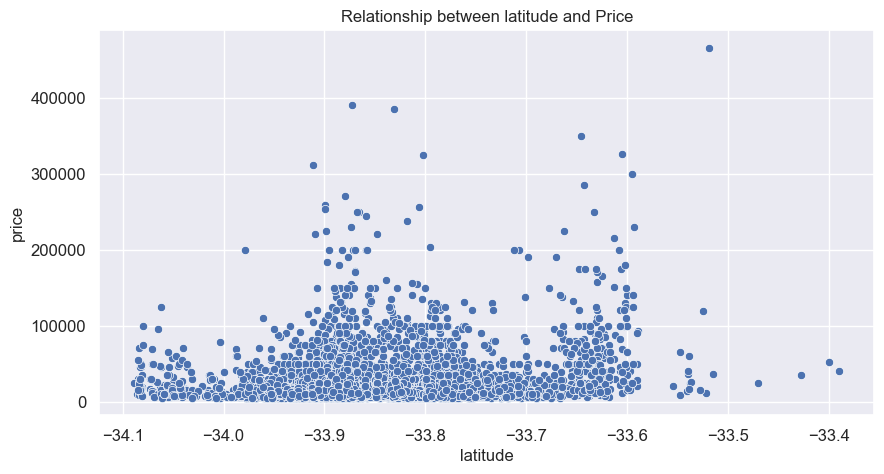

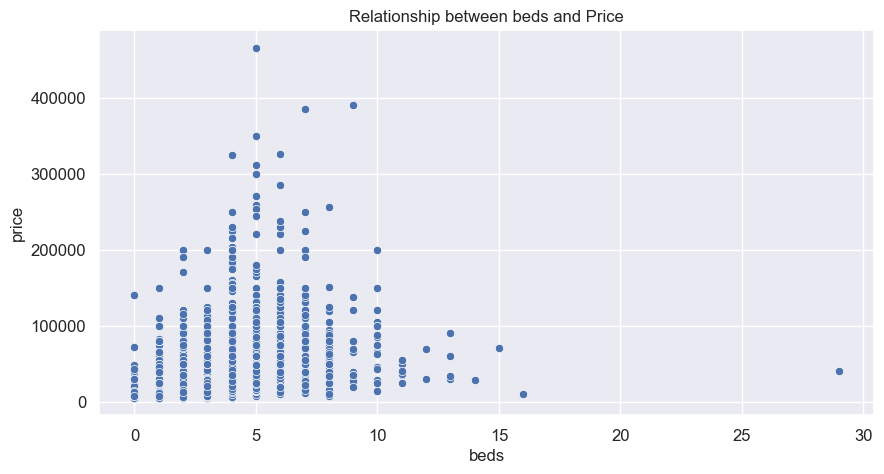

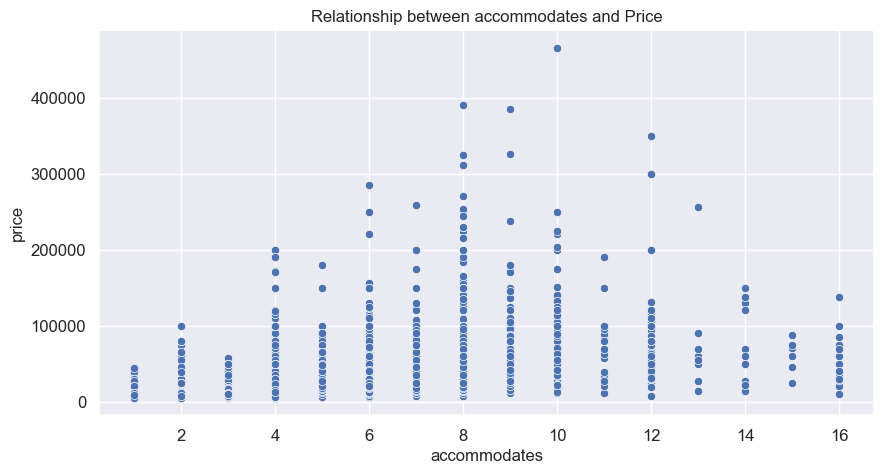

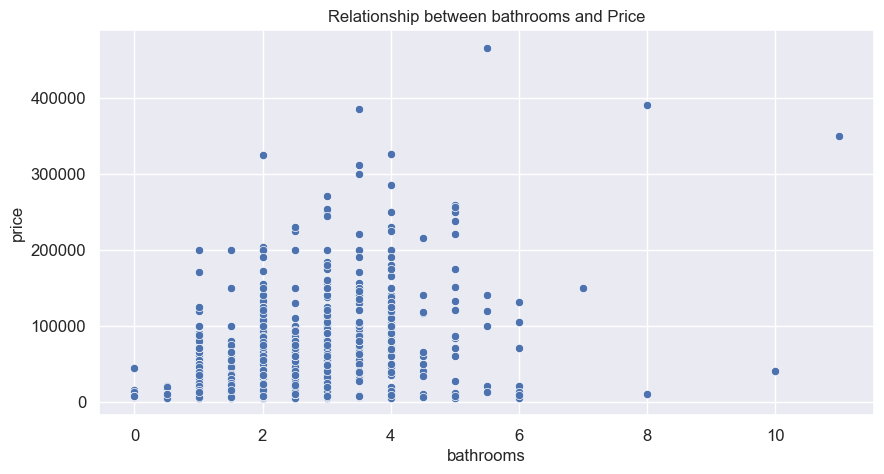

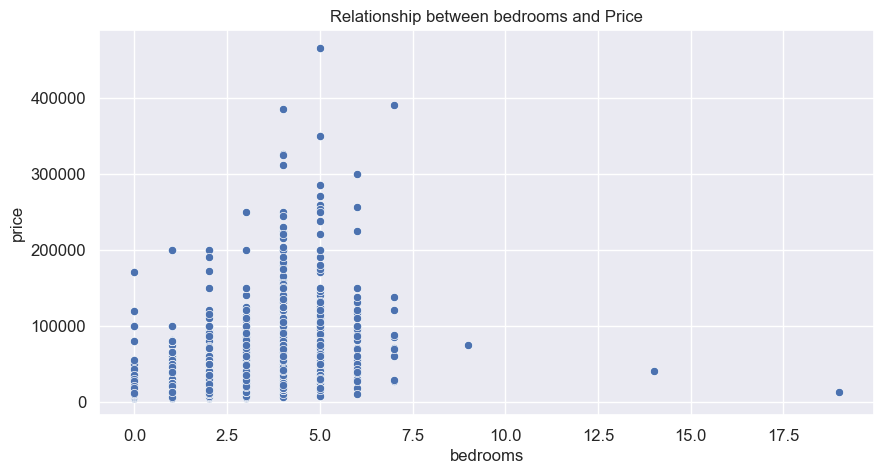

In [24]:
for a in attr_of_imp:
    plt.figure(figsize=(10,5))
    sns.scatterplot(x = a, y = 'price', data = df_air, markers=True, legend='full')
    plt.title('Relationship between '+a+' and Price', size=12)
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.savefig("C:\\Users\\sriva\\Downloads\\Intro to ML-EECE5644\\Machine Learning\\Proj\\Findings\\Plots\\Scatterplots\\"+a+" vs price.png")
    plt.show()

#### 8. Exploring Categorical attributes

In [25]:
print('Total number of Airbnb properties in the data are ', df_air['name'].nunique())

Total number of Airbnb properties in the data are  9774


In [26]:
print('The total number of hosts in the data are ', df_air['host_id'].nunique())

The total number of hosts in the data are  8260


In [27]:
print('Top 10 hosts and the number of Airbnb properties they own are \n')
display(df_air['host_id'].value_counts()[:10])

Top 10 hosts and the number of Airbnb properties they own are 



15739069     50
36410227     47
15469257     43
7409213      42
2450066      32
16357713     28
15193662     26
137278159    23
24721535     23
113874       20
Name: host_id, dtype: int64

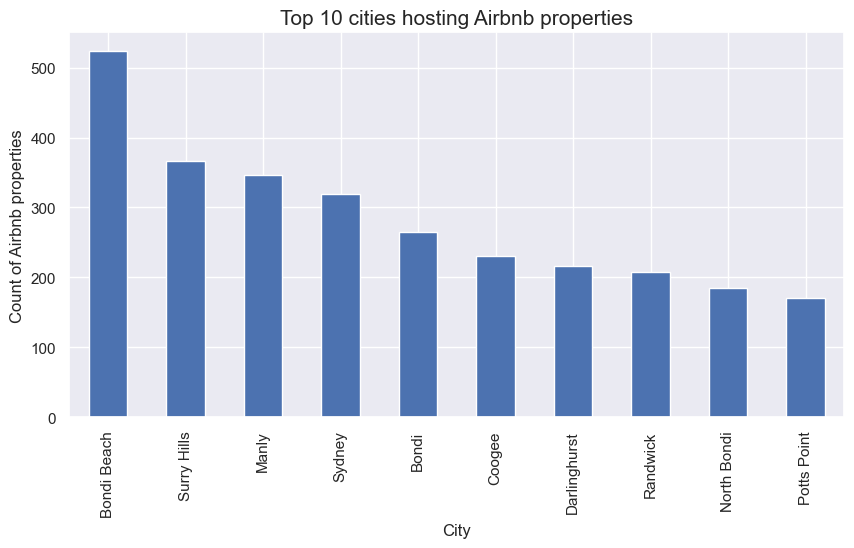

In [28]:
plt.figure(figsize=(10,5))
df_air['city'].value_counts()[:10].plot(kind='bar')
plt.title('Top 10 cities hosting Airbnb properties', size=15)
plt.ylabel('Count of Airbnb properties')
plt.xlabel('City')
plt.show()

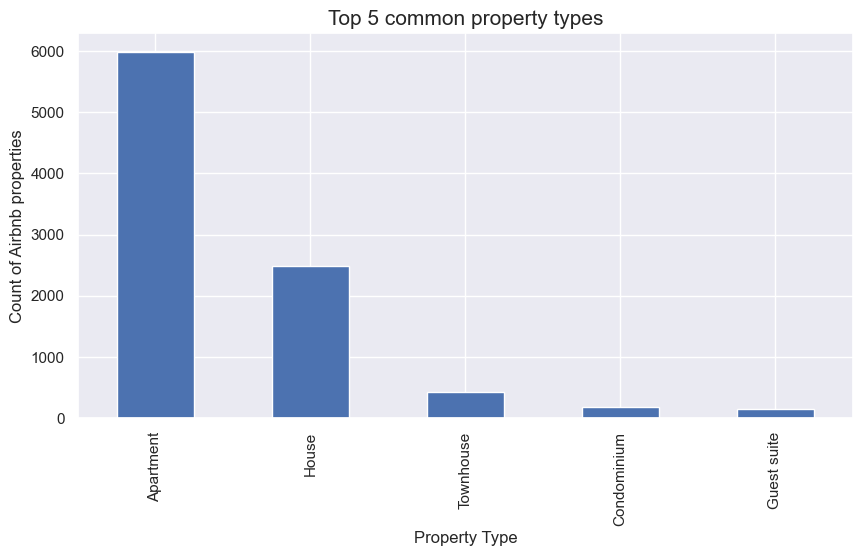

In [29]:
plt.figure(figsize=(10,5))
df_air['property_type'].value_counts()[:5].plot(kind='bar')
plt.title('Top 5 common property types', size=15)
plt.ylabel('Count of Airbnb properties')
plt.xlabel('Property Type')
plt.show()

###### Average statistics of room types in every property type

In [30]:
display(df_air[['property_type', 'room_type','accommodates', 'bathrooms', 'bedrooms', 'beds']].groupby(by=['property_type', 'room_type'],axis=0, as_index=True, sort=True).mean().round())

accommodates  bathrooms  bedrooms  beds
property_type      room_type                                               
Aparthotel         Private room              2.0        1.0       0.0   1.0
Apartment          Entire home/apt           4.0        1.0       1.0   2.0
                   Private room              2.0        1.0       1.0   1.0
                   Shared room               2.0        1.0       1.0   1.0
Barn               Private room              2.0        1.0       1.0   1.0
Bed and breakfast  Entire home/apt           6.0        2.0       3.0   4.0
                   Private room              2.0        1.0       1.0   1.0
Boat               Entire home/apt           5.0        2.0       2.0   3.0
                   Shared room               2.0        1.0       1.0   1.0
Boutique hotel     Private room              2.0        1.0       0.0   1.0
Bungalow           Entire home/apt           6.0        2.0       3.0   4.0
                   Private room              2.0        1.0       1.0   1.0
Cabin              Entire home/apt           3.0        1.0       1.0   2.0
                   Private room              2.0        1.0       1.0   2.0
Camper/RV          Entire home/apt           4.0        0.0       0.0   2.0
                   Private room              4.0        1.0       1.0   3.0
Cave               Entire home/apt           1.0        1.0       1.0   1.0
Condominium        Entire home/apt           4.0        1.0       1.0   2.0
                   Private room              2.0        1.0       1.0   1.0
                   Shared room               4.0        2.0       1.0   2.0
Cottage            Entire home/apt           5.0        2.0       2.0   4.0
                   Private room              2.0        2.0       1.0   1.0
                   Shared room              16.0        4.0       1.0  16.0
Dome house         Entire home/apt           4.0        2.0       2.0   3.0
Farm stay          Entire home/apt           7.0        2.0       2.0   5.0
Guest suite        Entire home/apt           3.0        1.0       1.0   2.0
                   Private room              2.0        1.0       1.0   1.0
                   Shared room               1.0        1.0       1.0   1.0
Guesthouse         Entire home/apt           3.0        1.0       1.0   2.0
                   Private room              2.0        1.0       1.0   1.0
Hostel             Private room              2.0        2.0       2.0   1.0
                   Shared room               1.0        1.0       1.0   1.0
Hotel              Private room              2.0        2.0       1.0   1.0
House              Entire home/apt           7.0        2.0       3.0   4.0
                   Private room              2.0        1.0       1.0   1.0
                   Shared room               2.0        2.0       1.0   2.0
Island             Entire home/apt          10.0        6.0       4.0   4.0
Loft               Entire home/apt           3.0        1.0       1.0   2.0
                   Private room              2.0        1.0       1.0   1.0
Other              Entire home/apt           3.0        1.0       1.0   2.0
                   Private room              2.0        1.0       1.0   1.0
Serviced apartment Entire home/apt           4.0        1.0       1.0   2.0
                   Private room              3.0        1.0       1.0   2.0
Tent               Entire home/apt           3.0        3.0       1.0   3.0
                   Private room              6.0        1.0       1.0   6.0
                   Shared room               4.0        2.0       1.0   1.0
Tiny house         Entire home/apt           3.0        1.0       1.0   1.0
                   Private room              2.0        1.0       1.0   1.0
Townhouse          Entire home/apt           5.0        2.0       2.0   3.0
                   Private room              2.0        1.0       1.0   1.0
Villa              Entire home/apt           8.0        2.0       3.0   5.0
        

Property_Type 

In [31]:
prop = df_air[['property_type','accommodates', 'bathrooms', 'bedrooms', 'beds']].groupby(by=['property_type'],axis=0, as_index=False, sort=True).mean().round()

In [32]:
prop.head()

property_type  accommodates  bathrooms  bedrooms  beds
0         Aparthotel           2.0        1.0       0.0   1.0
1          Apartment           3.0        1.0       1.0   2.0
2               Barn           2.0        1.0       1.0   1.0
3  Bed and breakfast           2.0        1.0       1.0   1.0
4               Boat           4.0        2.0       2.0   3.0

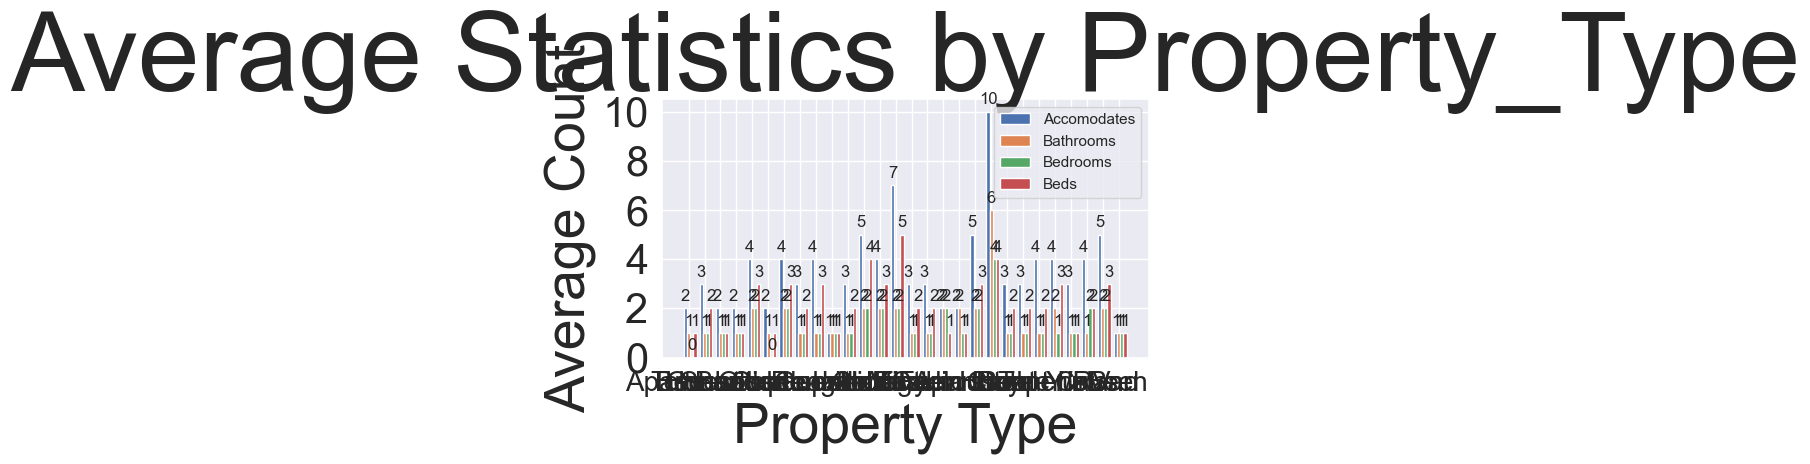

In [33]:
labels = df_air['property_type'].unique()

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - 0.2, prop['accommodates'], width, label='Accomodates')
rects2 = ax.bar(x , prop['bathrooms'], width, label='Bathrooms')
rects3 = ax.bar(x + 0.2, prop['bedrooms'], width, label='Bedrooms')
rects4 = ax.bar(x + 0.4, prop['beds'], width, label='Beds')



# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_ylabel('Average Count', size=40)
ax.set_xlabel('Property Type', size=40)
ax.set_title('Average Statistics by Property_Type', size=80)
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
ax.bar_label(rects4, padding=3)

plt.xticks(size=20)
plt.yticks(size=30)

fig.tight_layout()

plt.rcParams['figure.figsize'] = (90, 10)

plt.savefig("C:\\Users\\sriva\\Downloads\\Intro to ML-EECE5644\\Machine Learning\\Proj\\Findings\\Plots\\Barplots\\Avg_stats_prop_type.png")

plt.show()

Room_Type

In [34]:
room = df_air[['room_type','accommodates', 'bathrooms', 'bedrooms', 'beds']].groupby(by=['room_type'],axis=0, as_index=False, sort=True).mean().round()

In [35]:
room.head()

room_type  accommodates  bathrooms  bedrooms  beds
0  Entire home/apt           4.0        1.0       2.0   2.0
1     Private room           2.0        1.0       1.0   1.0
2      Shared room           2.0        1.0       1.0   2.0

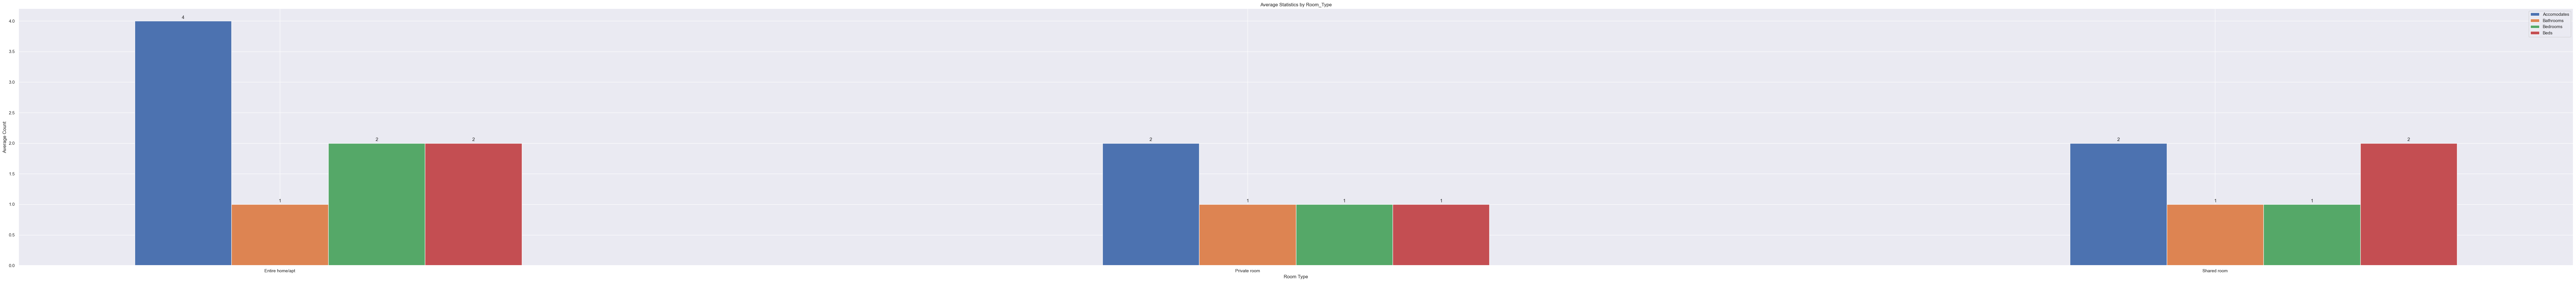

In [36]:
labels = room['room_type'].unique()

x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - 0.1, room['accommodates'], width, label='Accomodates')
rects2 = ax.bar(x , room['bathrooms'], width, label='Bathrooms')
rects3 = ax.bar(x + 0.1, room['bedrooms'], width, label='Bedrooms')
rects4 = ax.bar(x + 0.2, room['beds'], width, label='Beds')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Count')
ax.set_xlabel('Room Type')
ax.set_title('Average Statistics by Room_Type')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
ax.bar_label(rects4, padding=3)

fig.tight_layout()

#plt.rcParams['figure.figsize'] = (10, 5)

plt.savefig("C:\\Users\\sriva\\Downloads\\Intro to ML-EECE5644\\Machine Learning\\Proj\\Findings\\Plots\\Barplots\\Avg_stats_room_type.png")

plt.show()

In [37]:
df_x = df_air.iloc[:,0:-1]
X = df_x.drop(columns=['name', 'summary', 'description', 'experiences_offered',  'host_id', 'host_location', 'host_verifications', 'street', 'zipcode', 'smart_location', 'amenities','neighbourhood','neighbourhood_cleansed','city'])
print(X.shape)
X.info()

(9838, 43)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9838 entries, 0 to 9837
Data columns (total 43 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   host_since                                    9838 non-null   datetime64[ns]
 1   host_response_rate                            9838 non-null   float64       
 2   host_is_superhost                             9838 non-null   int64         
 3   host_listings_count                           9838 non-null   float64       
 4   host_total_listings_count                     9838 non-null   float64       
 5   host_identity_verified                        9838 non-null   int64         
 6   latitude                                      9838 non-null   float64       
 7   longitude                                     9838 non-null   float64       
 8   is_location_exact                             9838 non-nu

In [38]:
y = df_air.iloc[:,-1]
y

0        5800.0
1       12500.0
2        9900.0
3        9900.0
4       12500.0
         ...   
9833    12800.0
9834    12000.0
9835     7100.0
9836     6300.0
9837    13000.0
Name: price, Length: 9838, dtype: float64

In [39]:
X_categorical = X.select_dtypes(include='object')
print(X_categorical.shape)
X_categorical.info()

(9838, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9838 entries, 0 to 9837
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   property_type        9838 non-null   object
 1   room_type            9838 non-null   object
 2   bed_type             9838 non-null   object
 3   cancellation_policy  9837 non-null   object
dtypes: object(4)
memory usage: 307.6+ KB


In [40]:
def set_pandas_display_options() -> None:
    """Set pandas display options."""
    display = pd.options.display
    display.max_columns = 1000
    display.max_rows = 1000
    display.max_colwidth = 199
    display.width = 1000
set_pandas_display_options()

In [41]:
display(pd.DataFrame(X_categorical.isna().sum().reset_index()))

index  0
0        property_type  0
1            room_type  0
2             bed_type  0
3  cancellation_policy  1

In [42]:
X_one_hot = pd.get_dummies(X_categorical)
X_one_hot
X_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9838 entries, 0 to 9837
Data columns (total 43 columns):
 #   Column                                           Non-Null Count  Dtype
---  ------                                           --------------  -----
 0   property_type_Aparthotel                         9838 non-null   uint8
 1   property_type_Apartment                          9838 non-null   uint8
 2   property_type_Barn                               9838 non-null   uint8
 3   property_type_Bed and breakfast                  9838 non-null   uint8
 4   property_type_Boat                               9838 non-null   uint8
 5   property_type_Boutique hotel                     9838 non-null   uint8
 6   property_type_Bungalow                           9838 non-null   uint8
 7   property_type_Cabin                              9838 non-null   uint8
 8   property_type_Camper/RV                          9838 non-null   uint8
 9   property_type_Cave                               983

In [43]:
X_numerical = X.select_dtypes(exclude=['object', 'datetime64'])
X_num = X_numerical.astype(float)

In [44]:
display(pd.DataFrame(X_num.isna().sum().reset_index()))

index     0
0                             host_response_rate     0
1                              host_is_superhost     0
2                            host_listings_count     0
3                      host_total_listings_count     0
4                         host_identity_verified     0
5                                       latitude     0
6                                      longitude     0
7                              is_location_exact     0
8                                   accommodates     0
9                                      bathrooms     5
10                                      bedrooms     3
11                                          beds    14
12                             cleaning_fee_perc  2445
13                               guests_included     0
14                             extra_people_perc     0
15                                minimum_nights     0
16                                maximum_nights     0
17                        minimum_minimum_nights     0
18                        maximum_minimum_nights     0
19                        minimum_maximum_nights     0
20                        maximum_maximum_nights     0
21                        minimum_nights_avg_ntm     0
22                        maximum_nights_avg_ntm     0
23                               availability_30     0
24                               availability_60     0
25                               availability_90     0
26                              availability_365     0
27                             number_of_reviews     0
28                         number_of_reviews_ltm     0
29                              requires_license     0
30                              instant_bookable     0
31                      is_business_travel_ready     0
32                 require_guest_profile_picture     0
33              require_guest_phone_verification     0
34                calculated_host_listings_count     0
35   calculated_host_listings_count_entire_homes     0
36  calculated_host_listings_count_private_rooms     0
37   calculated_host_listings_count_shared_rooms     0

In [45]:
X_num['bathrooms'] = X_num['bathrooms'].fillna(X_num['bathrooms'].mean())
X_num['bedrooms'] = X_num['bedrooms'].fillna(X_num['bedrooms'].mean())
X_num['beds'] = X_num['beds'].fillna(X_num['beds'].mean())
X_num['cleaning_fee_perc'] = X_num['cleaning_fee_perc'].fillna(X_num['cleaning_fee_perc'].mean())

print(X_num.shape)

(9838, 38)


### Libraries for Models

In [46]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBRegressor
import catboost as cb

from sklearn.metrics import mean_squared_error
import math

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

c:\users\sriva\appdata\local\programs\python\python38\lib\site-packages\xgboost\compat.py:85: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [47]:
%matplotlib notebook

### Scaling

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_num_sc = sc.fit_transform(X_num)
print(X_num_sc.shape)


(9838, 38)


### Concatinating numerical and categorical

In [49]:
X_num_sc = pd.DataFrame(X_num_sc, columns = X_num.columns)
X = pd.concat([X_num_sc, X_one_hot], axis=1)
X

host_response_rate  host_is_superhost  host_listings_count  host_total_listings_count  host_identity_verified  latitude  longitude  is_location_exact  accommodates  bathrooms  bedrooms      beds  cleaning_fee_perc  guests_included  extra_people_perc  minimum_nights  maximum_nights  minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm  availability_30  availability_60  availability_90  availability_365  number_of_reviews  number_of_reviews_ltm  requires_license  instant_bookable  is_business_travel_ready  require_guest_profile_picture  require_guest_phone_verification  calculated_host_listings_count  calculated_host_listings_count_entire_homes  calculated_host_listings_count_private_rooms  calculated_host_listings_count_shared_rooms  property_type_Aparthotel  property_type_Apartment  property_type_Barn  property_type_Bed and breakfast  property_type_Boat  property_type_Boutique hotel  \
0               1.015304          -0.420134            -0.007389                  -0.007389                1.238653  1.592426  -1.770253          -1.737939     -0.714322  -0.540499 -0.586560 -0.705565       6.036050e-01        -0.450216           2.375694       -0.164372        0.844547               -0.150425               -0.185639                0.852632                0.817902               -0.167771                0.835168         0.330479         0.027865         0.513802          1.869744          -0.438805              -0.473474               0.0         -0.872823                       0.0                      -0.071472                          -0.07701                       -0.021895                                    -0.073451                                      0.783582                                    -0.057762                         0                        1                   0                                0                   0                             0   
1               1.015304          -0.420134            -0.268510                  -0.268510                1.238653  1.494524   1.086180           0.575394     -0.268217  -0.540499 -0.586560 -0.062333       5.703220e-01         0.252836          -0.025960       -0.112630       -1.162181               -0.097676               -0.134798               -1.152215               -1.129459               -0.115893               -1.140345        -0.710421        -0.266450         0.320986          1.746766          -0.380188              -0.399894               0.0         -0.872823                       0.0                      -0.071472                          -0.07701                       -0.225639                                    -0.235945                                      0.190500                                    -0.057762                         0                        1                   0                                0                   0                             0   
2              -1.035651          -0.420134            -0.268510                  -0.268510               -0.807329 -0.404479  -0.383948           0.575394     -0.714322  -0.540499 -0.586560 -0.705565      -2.364899e-16        -0.450216          -0.462624       -0.216114        0.844547               -0.203174               -0.236480                0.852632                0.817902               -0.219649                0.835168        -0.797162        -0.855081        -0.891001         -0.802979          -0.438805              -0.473474               0.0         -0.872823                       0.0                      -0.071472                          -0.07701                       -0.266388                                    -0.276568                                      0.190500                                    -0.057762                         0                        0                   0                                0                   0                             0   
3              -1.035651  

### Splitting into Train and Validation sets without using PCA

In [50]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=0)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8362 entries, 7679 to 2732
Data columns (total 81 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   host_response_rate                               8362 non-null   float64
 1   host_is_superhost                                8362 non-null   float64
 2   host_listings_count                              8362 non-null   float64
 3   host_total_listings_count                        8362 non-null   float64
 4   host_identity_verified                           8362 non-null   float64
 5   latitude                                         8362 non-null   float64
 6   longitude                                        8362 non-null   float64
 7   is_location_exact                                8362 non-null   float64
 8   accommodates                                     8362 non-null   float64
 9   bathrooms                  

### PCA


In [51]:
from sklearn.decomposition import PCA
pca = PCA()

X_num_pca = pca.fit_transform(X_num_sc)
print(X_num_pca.shape)


(9838, 38)


In [52]:
prin_comp = pd.DataFrame(data=X_num_pca)
display(prin_comp.shape)


(9838, 38)

In [53]:
var_prop = pca.explained_variance_ratio_
var_exp = pca.explained_variance_
cum_prop = np.cumsum(pca.explained_variance_ratio_)

In [54]:
for i in range(38):
  print('PC%2d'%(i+1))
  print("Explained Variance : ", var_exp[i])
  print("Proportion Variance : ", var_prop[i])
  print("Cummulative Proportion Variance : ", cum_prop[i])
  print('')

PC 1
Explained Variance :  5.2202665290951
Proportion Variance :  0.14499266406538266
Cummulative Proportion Variance :  0.14499266406538266

PC 2
Explained Variance :  4.018304811461512
Proportion Variance :  0.11160823233704585
Cummulative Proportion Variance :  0.2566008964024285

PC 3
Explained Variance :  3.744195228042165
Proportion Variance :  0.10399485119562113
Cummulative Proportion Variance :  0.36059574759804963

PC 4
Explained Variance :  3.592680992501499
Proportion Variance :  0.09978655023389242
Cummulative Proportion Variance :  0.46038229783194207

PC 5
Explained Variance :  3.10769877013569
Proportion Variance :  0.086316191191256
Cummulative Proportion Variance :  0.5466984890231981

PC 6
Explained Variance :  2.098529433054289
Proportion Variance :  0.05828655901423906
Cummulative Proportion Variance :  0.6049850480374371

PC 7
Explained Variance :  1.7868584514218857
Proportion Variance :  0.04962991175554277
Cummulative Proportion Variance :  0.6546149597929799



In [55]:
X_pca = pd.concat([X_num.iloc[:,0:22], X_one_hot], axis=1)
X_pca

host_response_rate  host_is_superhost  host_listings_count  host_total_listings_count  host_identity_verified  latitude  longitude  is_location_exact  accommodates  bathrooms  bedrooms  beds  cleaning_fee_perc  guests_included  extra_people_perc  minimum_nights  maximum_nights  minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  property_type_Aparthotel  property_type_Apartment  property_type_Barn  property_type_Bed and breakfast  property_type_Boat  property_type_Boutique hotel  property_type_Bungalow  property_type_Cabin  property_type_Camper/RV  property_type_Cave  property_type_Condominium  property_type_Cottage  property_type_Dome house  property_type_Farm stay  property_type_Guest suite  property_type_Guesthouse  property_type_Hostel  property_type_Hotel  property_type_House  property_type_Island  property_type_Loft  property_type_Other  property_type_Serviced apartment  property_type_Tent  \
0                  100.0                0.0                  9.0                        9.0                     1.0 -33.74843  151.06609                0.0           2.0        1.0       1.0   1.0          69.000000              1.0               52.0             2.0          1125.0                     2.0                     2.0                  1125.0                  1125.0                     2.0                         0                        1                   0                                0                   0                             0                       0                    0                        0                   0                          0                      0                         0                        0                          0                         0                     0                    0                    0                     0                   0                    0                                 0                   0   
1                  100.0                0.0                  1.0                        1.0                     1.0 -33.75546  151.29509                1.0           3.0        1.0       1.0   2.0          68.000000              2.0                8.0             3.0            60.0                     3.0                     3.0                    60.0                    60.0                     3.0                         0                        1                   0                                0                   0                             0                       0                    0                        0                   0                          0                      0                         0                        0                          0                         0                     0                    0                    0                     0                   0                    0                                 0                   0   
2                    0.0                0.0                  1.0                        1.0                     0.0 -33.89182  151.17723                1.0           2.0        1.0       1.0   1.0          50.864466              1.0                0.0             1.0          1125.0                     1.0                     1.0                  1125.0                  1125.0                     1.0                         0                        0                   0                                0                   0                             0                       0                    0                        0                   0                          0                      0                         0                        0                          0                         0                     0                    0                    1                     0                   0                    0                                 0                   0   
3                    0.0                0.0                  1

#### Splitting into Train and Validation sets with PCA

In [56]:
X_train_pca, X_val_pca, y_train_pca, y_val_pca = train_test_split(X_pca, y, test_size=0.15, random_state=0)
X_train_pca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8362 entries, 7679 to 2732
Data columns (total 65 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   host_response_rate                               8362 non-null   float64
 1   host_is_superhost                                8362 non-null   float64
 2   host_listings_count                              8362 non-null   float64
 3   host_total_listings_count                        8362 non-null   float64
 4   host_identity_verified                           8362 non-null   float64
 5   latitude                                         8362 non-null   float64
 6   longitude                                        8362 non-null   float64
 7   is_location_exact                                8362 non-null   float64
 8   accommodates                                     8362 non-null   float64
 9   bathrooms                  

### Linear Regression


In [57]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_pca, y_train_pca)

LinearRegression()

In [58]:
linear_pred = linear_reg.predict(X_val_pca)

In [59]:
MSE = mean_squared_error(y_val_pca, linear_pred)
RMSE = math.sqrt(MSE)
print(RMSE)
print(y_val_pca.max() - y_val_pca.min())
print(RMSE/(y_val_pca.max() - y_val_pca.min()))

16740.283795501196
294800.0
0.056785223186910434


In [60]:
mean_absolute_percentage_error(y_val_pca.values, linear_pred)

0.5473085916644379

In [61]:
r2_score(y_val_pca.values, linear_pred)

0.46179800005488625

<IPython.core.display.Javascript object>


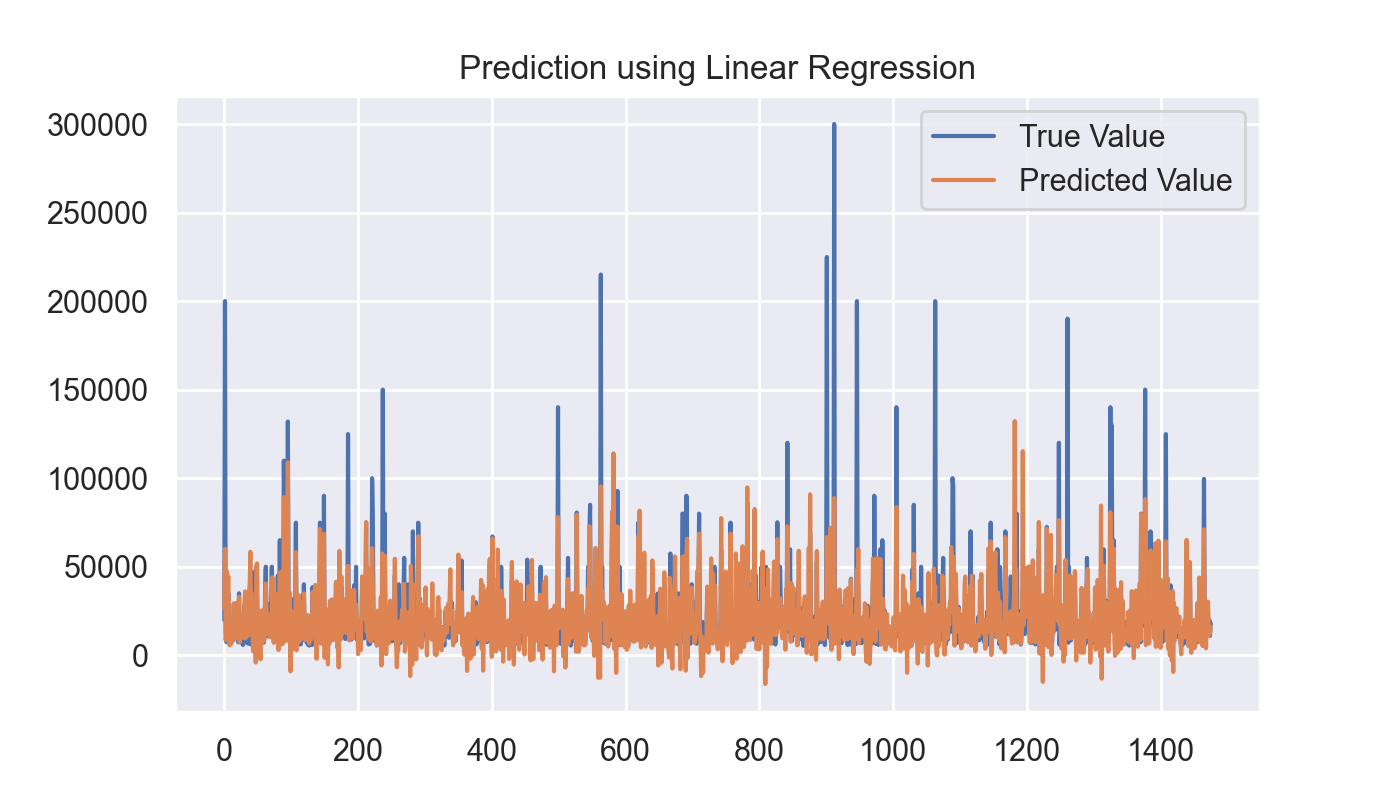

In [62]:
plt.figure(figsize=(7, 4))
plt.title('Prediction using Linear Regression')
plt.plot(y_val_pca.values, label='True Value')
plt.plot(linear_pred, label='Predicted Value')
plt.legend()
plt.show()

### Random Forest Regression

In [63]:
reg_rf = RandomForestRegressor(n_estimators = 10, random_state = 0)
reg_rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [64]:
rf_pred = reg_rf.predict(X_val)

In [65]:
MSE = mean_squared_error(y_val, rf_pred)
RMSE = math.sqrt(MSE)
print(RMSE)
print(y_val.max() - y_val.min())
print(RMSE/(y_val.max() - y_val.min()))

14515.525845888458
294800.0
0.04923855442974375


In [66]:
mean_absolute_percentage_error(y_val.values, rf_pred)

0.3256920593664389

In [67]:
r2_score(y_val.values, rf_pred)

0.5953447106318184

<IPython.core.display.Javascript object>


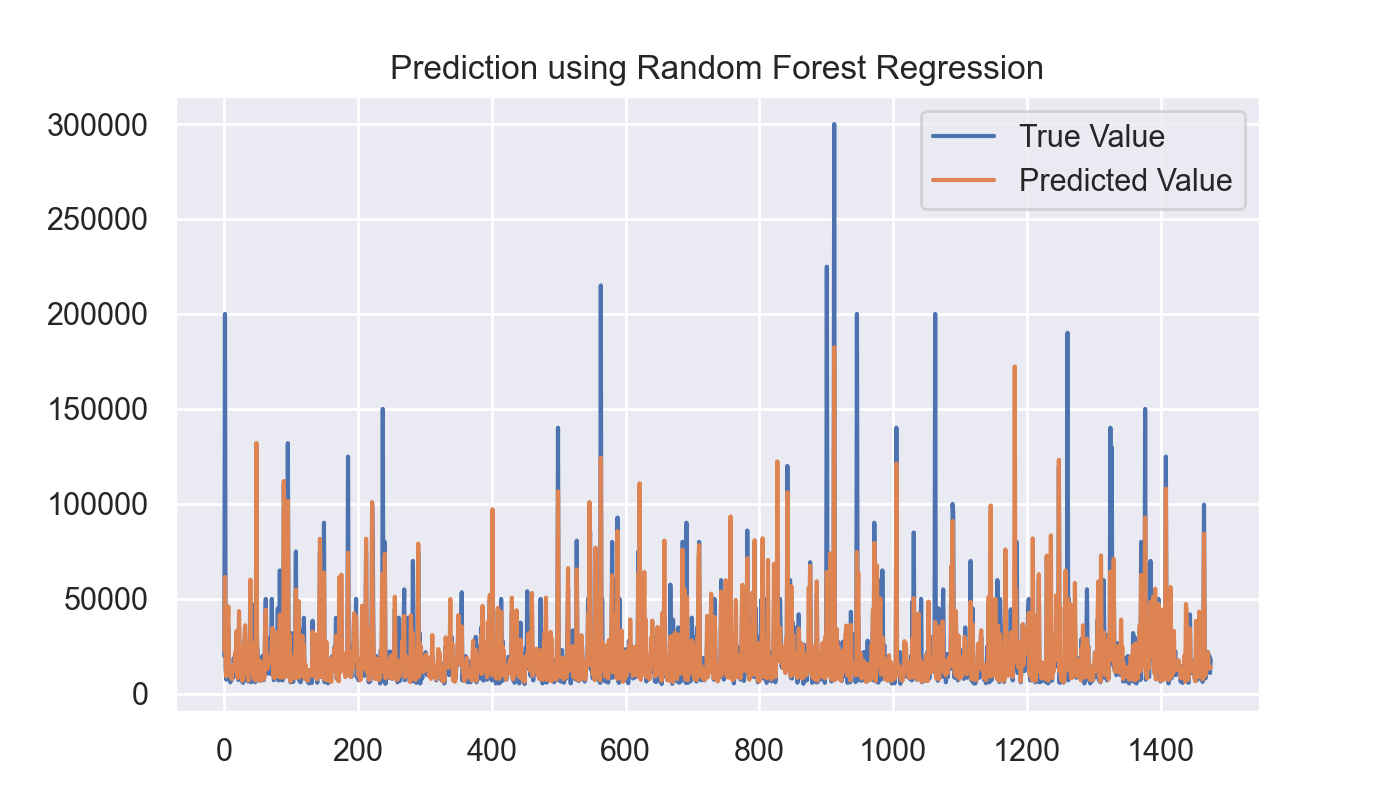

In [68]:
plt.figure(figsize=(7, 4))
plt.title('Prediction using Random Forest Regression')
plt.plot(y_val.values, label='True Value')
plt.plot(rf_pred, label='Predicted Value')
plt.legend()
plt.show()

### XG Boost

In [69]:
reg_xg = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
reg_xg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eta=0.1, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.100000001, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method=None, validate_parameters=False, verbosity=None)

In [70]:
xgb_pred = reg_xg.predict(X_val)

In [71]:
MSE = mean_squared_error(y_val, xgb_pred)
RMSE = math.sqrt(MSE)
print(RMSE)
print(y_val.max() - y_val.min())
print(RMSE/(y_val.max() - y_val.min()))

13622.232164487208
294800.0
0.04620838590395932


In [72]:
mean_absolute_percentage_error(y_val.values, xgb_pred)

0.311653488891218

In [73]:
r2_score(y_val.values, xgb_pred)

0.6436176147722468

<IPython.core.display.Javascript object>


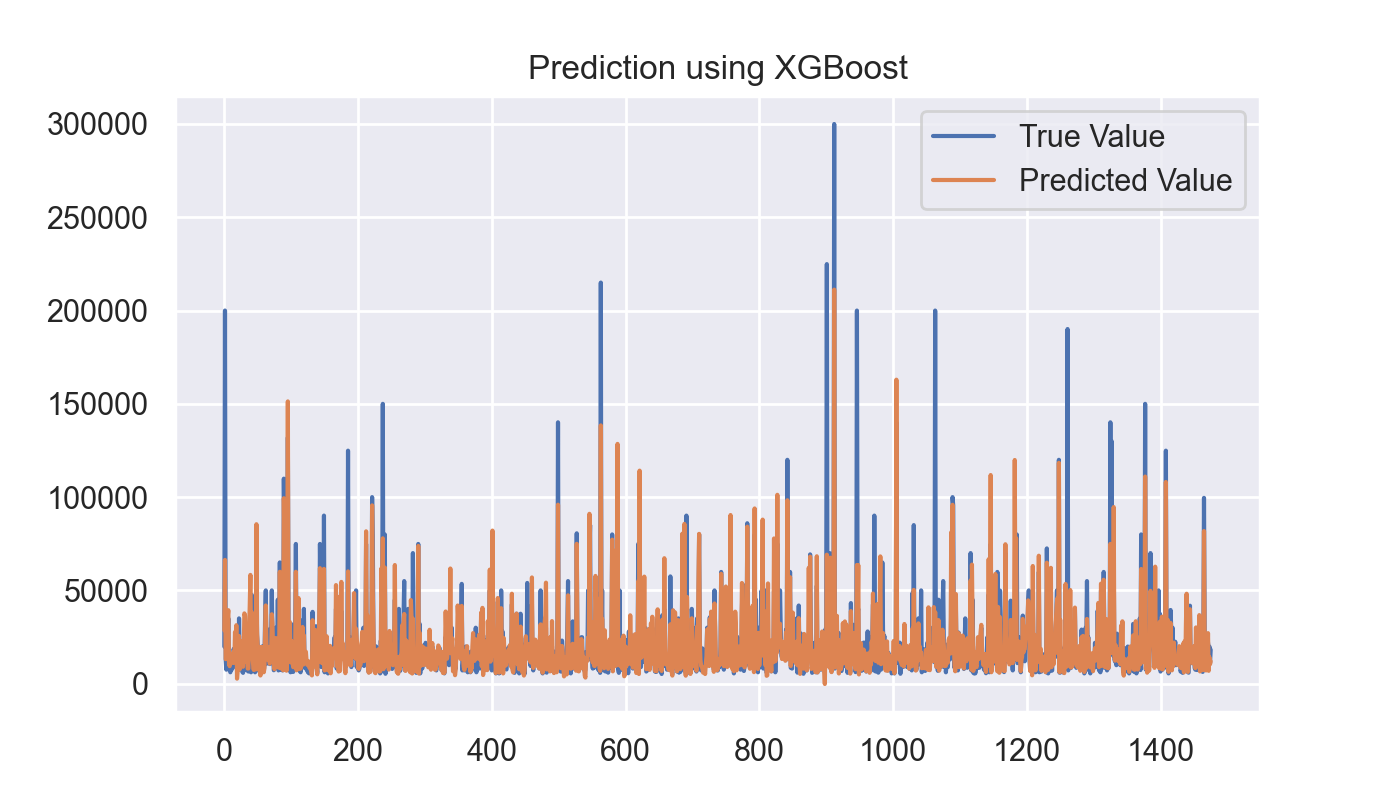

In [74]:
plt.figure(figsize=(7, 4))
plt.title('Prediction using XGBoost')
plt.plot(y_val.values, label='True Value')
plt.plot(xgb_pred, label='Predicted Value')
plt.legend()
plt.show()

### Neural Networks

In [75]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [76]:
from tensorflow.keras import metrics
from tensorflow.keras import losses


In [77]:
ann = tf.keras.models.Sequential()

In [78]:
ann.add(tf.keras.layers.Dense(units=81, activation='relu'))

In [79]:
ann.add(tf.keras.layers.Dense(units=20, activation='relu'))

In [80]:
ann.add(tf.keras.layers.Dense(units=1, activation='relu'))

In [81]:

ann.compile(optimizer='adam', loss='MeanAbsolutePercentageError', metrics=['MeanAbsolutePercentageError'])


In [82]:
ann.fit(X_train, y_train, batch_size = 50, epochs = 500)

Epoch 1/500
168/168 [==============================] - 2s 4ms/step - loss: 99.7098 - mean_absolute_percentage_error: 99.7098
Epoch 2/500
168/168 [==============================] - 1s 3ms/step - loss: 94.1191 - mean_absolute_percentage_error: 94.1191
Epoch 3/500
168/168 [==============================] - 1s 3ms/step - loss: 72.2785 - mean_absolute_percentage_error: 72.2785
Epoch 4/500
168/168 [==============================] - 1s 3ms/step - loss: 56.1351 - mean_absolute_percentage_error: 56.1351
Epoch 5/500
168/168 [==============================] - 1s 3ms/step - loss: 51.7816 - mean_absolute_percentage_error: 51.7816
Epoch 6/500
168/168 [==============================] - 1s 3ms/step - loss: 48.0007 - mean_absolute_percentage_error: 48.0007
Epoch 7/500
168/168 [==============================] - 1s 3ms/step - loss: 44.0164 - mean_absolute_percentage_error: 44.0164
Epoch 8/500
168/168 [==============================] - 1s 3ms/step - loss: 39.8512 - mean_absolute_percentage_error: 39.8512


168/168 [==============================] - 1s 3ms/step - loss: 25.7050 - mean_absolute_percentage_error: 25.7050
Epoch 67/500
168/168 [==============================] - 1s 3ms/step - loss: 25.6645 - mean_absolute_percentage_error: 25.6645
Epoch 68/500
168/168 [==============================] - 1s 3ms/step - loss: 25.6338 - mean_absolute_percentage_error: 25.6338
Epoch 69/500
168/168 [==============================] - 1s 3ms/step - loss: 25.6113 - mean_absolute_percentage_error: 25.6113
Epoch 70/500
168/168 [==============================] - 1s 3ms/step - loss: 25.5766 - mean_absolute_percentage_error: 25.5766
Epoch 71/500
168/168 [==============================] - 1s 3ms/step - loss: 25.5461 - mean_absolute_percentage_error: 25.5461
Epoch 72/500
168/168 [==============================] - 1s 3ms/step - loss: 25.5120 - mean_absolute_percentage_error: 25.5120
Epoch 73/500
168/168 [==============================] - 1s 3ms/step - loss: 25.4924 - mean_absolute_percentage_error: 25.4924
Epoch

168/168 [==============================] - 1s 4ms/step - loss: 24.4823 - mean_absolute_percentage_error: 24.4823
Epoch 131/500
168/168 [==============================] - 1s 4ms/step - loss: 24.4741 - mean_absolute_percentage_error: 24.4741
Epoch 132/500
168/168 [==============================] - 1s 4ms/step - loss: 24.4694 - mean_absolute_percentage_error: 24.4694
Epoch 133/500
168/168 [==============================] - 1s 3ms/step - loss: 24.4566 - mean_absolute_percentage_error: 24.4566
Epoch 134/500
168/168 [==============================] - 1s 3ms/step - loss: 24.4433 - mean_absolute_percentage_error: 24.4433
Epoch 135/500
168/168 [==============================] - 1s 3ms/step - loss: 24.4285 - mean_absolute_percentage_error: 24.4285
Epoch 136/500
168/168 [==============================] - 1s 3ms/step - loss: 24.4257 - mean_absolute_percentage_error: 24.4257
Epoch 137/500
168/168 [==============================] - 1s 3ms/step - loss: 24.4112 - mean_absolute_percentage_error: 24.411

168/168 [==============================] - 1s 3ms/step - loss: 23.9702 - mean_absolute_percentage_error: 23.9702
Epoch 195/500
168/168 [==============================] - 1s 3ms/step - loss: 23.9673 - mean_absolute_percentage_error: 23.9673
Epoch 196/500
168/168 [==============================] - 1s 3ms/step - loss: 23.9589 - mean_absolute_percentage_error: 23.9589
Epoch 197/500
168/168 [==============================] - 1s 3ms/step - loss: 23.9572 - mean_absolute_percentage_error: 23.9572
Epoch 198/500
168/168 [==============================] - 1s 3ms/step - loss: 23.9487 - mean_absolute_percentage_error: 23.9487
Epoch 199/500
168/168 [==============================] - 1s 3ms/step - loss: 23.9484 - mean_absolute_percentage_error: 23.9484
Epoch 200/500
168/168 [==============================] - 1s 3ms/step - loss: 23.9401 - mean_absolute_percentage_error: 23.9401
Epoch 201/500
168/168 [==============================] - 1s 3ms/step - loss: 23.9315 - mean_absolute_percentage_error: 23.931

168/168 [==============================] - 1s 3ms/step - loss: 23.5940 - mean_absolute_percentage_error: 23.5940
Epoch 259/500
168/168 [==============================] - 1s 3ms/step - loss: 23.5962 - mean_absolute_percentage_error: 23.5962
Epoch 260/500
168/168 [==============================] - 0s 2ms/step - loss: 23.5880 - mean_absolute_percentage_error: 23.5880
Epoch 261/500
168/168 [==============================] - 1s 3ms/step - loss: 23.5883 - mean_absolute_percentage_error: 23.5883
Epoch 262/500
168/168 [==============================] - 1s 3ms/step - loss: 23.5773 - mean_absolute_percentage_error: 23.5773
Epoch 263/500
168/168 [==============================] - 1s 3ms/step - loss: 23.5761 - mean_absolute_percentage_error: 23.5761
Epoch 264/500
168/168 [==============================] - 1s 3ms/step - loss: 23.5663 - mean_absolute_percentage_error: 23.5663
Epoch 265/500
168/168 [==============================] - 1s 3ms/step - loss: 23.5653 - mean_absolute_percentage_error: 23.565

168/168 [==============================] - 1s 4ms/step - loss: 23.2999 - mean_absolute_percentage_error: 23.2999
Epoch 323/500
168/168 [==============================] - 1s 3ms/step - loss: 23.2947 - mean_absolute_percentage_error: 23.2947
Epoch 324/500
168/168 [==============================] - 1s 4ms/step - loss: 23.2973 - mean_absolute_percentage_error: 23.2973
Epoch 325/500
168/168 [==============================] - 1s 4ms/step - loss: 23.2913 - mean_absolute_percentage_error: 23.2913
Epoch 326/500
168/168 [==============================] - 1s 4ms/step - loss: 23.2763 - mean_absolute_percentage_error: 23.2763
Epoch 327/500
168/168 [==============================] - 1s 4ms/step - loss: 23.2801 - mean_absolute_percentage_error: 23.2801
Epoch 328/500
168/168 [==============================] - 1s 4ms/step - loss: 23.2738 - mean_absolute_percentage_error: 23.2738
Epoch 329/500
168/168 [==============================] - 1s 4ms/step - loss: 23.2752 - mean_absolute_percentage_error: 23.275

168/168 [==============================] - 1s 3ms/step - loss: 23.0584 - mean_absolute_percentage_error: 23.0584
Epoch 387/500
168/168 [==============================] - 1s 3ms/step - loss: 23.0408 - mean_absolute_percentage_error: 23.0408
Epoch 388/500
168/168 [==============================] - 1s 3ms/step - loss: 23.0473 - mean_absolute_percentage_error: 23.0473
Epoch 389/500
168/168 [==============================] - 1s 3ms/step - loss: 23.0336 - mean_absolute_percentage_error: 23.0336
Epoch 390/500
168/168 [==============================] - 1s 3ms/step - loss: 23.0362 - mean_absolute_percentage_error: 23.0362
Epoch 391/500
168/168 [==============================] - 1s 3ms/step - loss: 23.0302 - mean_absolute_percentage_error: 23.0302
Epoch 392/500
168/168 [==============================] - 1s 3ms/step - loss: 23.0241 - mean_absolute_percentage_error: 23.0241
Epoch 393/500
168/168 [==============================] - 1s 3ms/step - loss: 23.0201 - mean_absolute_percentage_error: 23.020

168/168 [==============================] - 1s 3ms/step - loss: 22.8408 - mean_absolute_percentage_error: 22.8408
Epoch 451/500
168/168 [==============================] - 1s 3ms/step - loss: 22.8486 - mean_absolute_percentage_error: 22.8486
Epoch 452/500
168/168 [==============================] - 1s 3ms/step - loss: 22.8315 - mean_absolute_percentage_error: 22.8315
Epoch 453/500
168/168 [==============================] - 1s 3ms/step - loss: 22.8449 - mean_absolute_percentage_error: 22.8449
Epoch 454/500
168/168 [==============================] - 1s 3ms/step - loss: 22.8363 - mean_absolute_percentage_error: 22.8363
Epoch 455/500
168/168 [==============================] - 1s 3ms/step - loss: 22.8369 - mean_absolute_percentage_error: 22.8369
Epoch 456/500
168/168 [==============================] - 1s 3ms/step - loss: 22.8332 - mean_absolute_percentage_error: 22.8332
Epoch 457/500
168/168 [==============================] - 1s 3ms/step - loss: 22.8321 - mean_absolute_percentage_error: 22.832

In [83]:
ann_pred = ann.predict(X_val)

47/47 [==============================] - 0s 2ms/step


In [84]:
MSE = mean_squared_error(y_val, ann_pred)
RMSE = math.sqrt(MSE)
print(RMSE)
print(y_val.max() - y_val.min())
print(RMSE/(y_val.max() - y_val.min()))

16059.55869922751
294800.0
0.05447611499059535


In [85]:
mean_absolute_percentage_error(y_val.values, ann_pred)

0.24927020440417091

In [86]:
r2_score(y_val.values, ann_pred)

0.5046788312453085

<IPython.core.display.Javascript object>


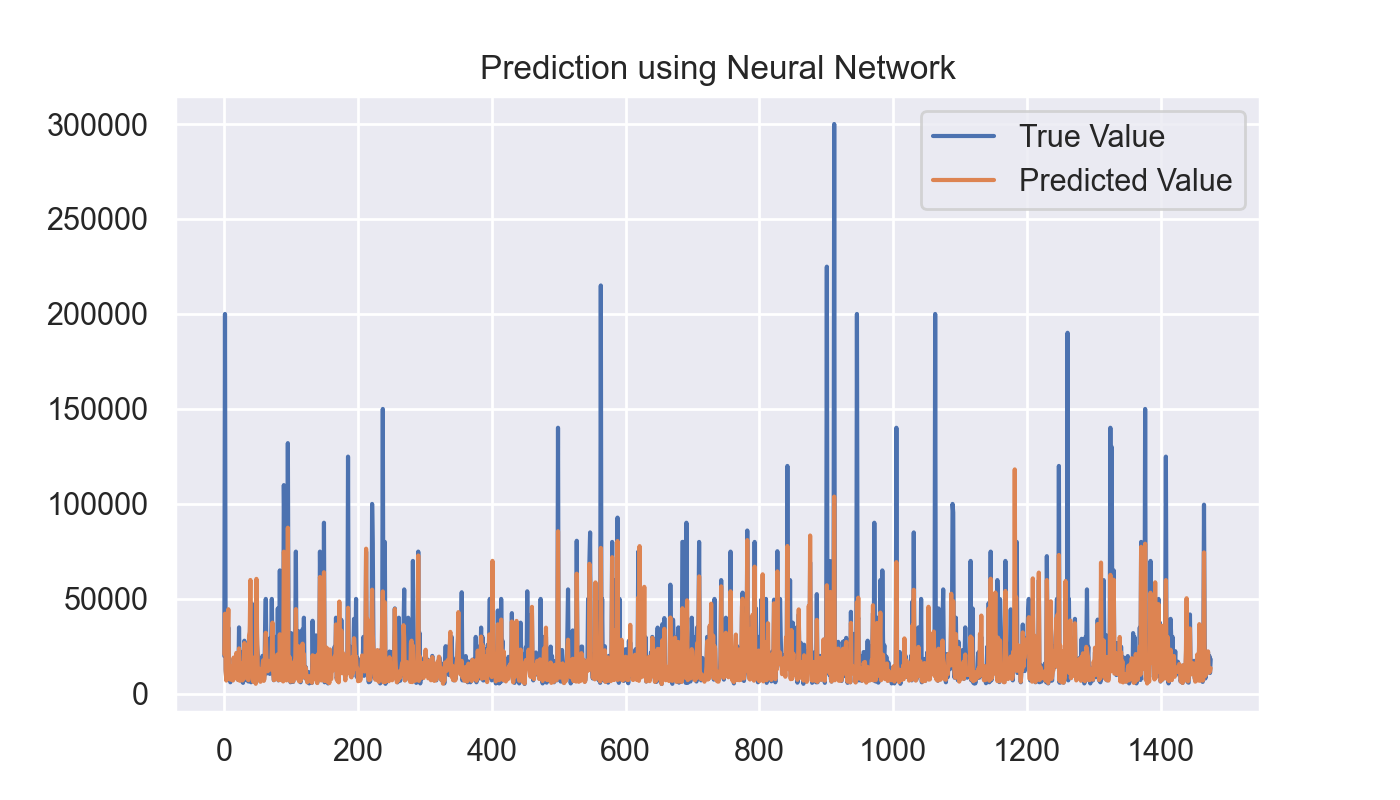

In [87]:
plt.figure(figsize=(7, 4))
plt.title('Prediction using Neural Network')
plt.plot(y_val.values, label='True Value')
plt.plot(ann_pred, label='Predicted Value')
plt.legend()
plt.show()